# Practical Machine Learning with SDSS Data

In this tutorial, we are going to use SDSS data to get some hands-on experience with machine learning. In the first exercise, we're going to train a classifier to distinguish stars from galaxies. This is an important problem, because many scientific questions depends on a clean data sets, and stars can be hard to distinguish from far-away galaxies. We don't want our study of galaxy evolution contaminated by stars in our own galaxy!

As a note in advance: none of the results you'll get out of this are science-worthy. This tutorial is meant to give you a first idea for how to set up your own machine learning model. But the first, and most important lesson, is this: **don't blindly trust your ML results.** 
As with any other science project, reporting or using results from a machine learning classifier or regressor requires careful understanding of the biases and caveats, assumptions and limitations that come with the data and algorithms chosen. Because the data sets you'll be using come straight out of the SDSS catalogue, you can expect there to be funny effects (both subtle and not) that may mess up any classification you'd want to do, and in a real-world setting, this would include understanding the limitations of the instrument and the data processing, before drawing any scientific conclusions from your procedure. 

With that out of the way, let's have some fun with machine learning! In this tutorial, we will use python and a library called `scikit-learn` to do our machine learning, `pandas` to deal with data structures, and `matplotlib` and `seaborn` to do our plotting. 

In [1]:
# make plots interactive and import plotting functionality
%matplotlib notebook
import matplotlib.pyplot as plt

# pretty plotting
import seaborn as sns

# my standard styles for plots
sns.set_style("whitegrid")
sns.set_context("talk")

# Always need numpy
import numpy as np

# data array operations
import pandas as pd

### Load the Data

Our first task is loading the data. For this exercise, we'll work with `sdss_dataset1.csv`. Your task is to find the correct file in this folder and load the data into a `pandas.DataFrame` (if you've never worked with pandas, take a look at the `read_csv` function):

In [2]:
# add your code for loading the data here:
data = pd.read_csv("sdss_dataset1.csv")

The `head` method on your loaded `DataFrame` gives you a quick overview of what's in your data.

**Exercise**: What columns do you recognize? Which ones are new to you? Which columns do you think will be su

In [3]:
data.head()

objid         ra       dec   dered_u   dered_g   dered_r  \
0  1237655499736023309  198.75865 -1.661133  19.19690  17.31563  16.55507   
1  1237655495977468550  198.69212 -1.551051  24.29937  21.38472  20.55953   
2  1237655495977533617  198.86527 -1.521170  18.74039  17.72001  17.69571   
3  1237655495977533557  198.79422 -1.477119  19.96338  18.80333  18.83536   
4  1237655495977533571  198.80730 -1.448024  19.15139  19.35184  19.69895   

    dered_i   dered_z     mag_u     mag_g     mag_r     mag_i     mag_z  \
0  16.35399  16.14767  19.28792  17.36450  16.65784  16.41547  16.26836   
1  19.59657  18.95012  23.98161  21.48122  20.69408  19.68314  19.05251   
2  17.70877  17.85738  18.74677  17.72853  17.71136  17.71290  17.87158   
3  18.95535  19.02479  19.93713  18.80160  18.82963  18.94912  19.04007   
4  19.97067  20.07913  19.15370  19.34383  19.69506  19.96842  20.05856   

     spec_z  u_g_color  g_r_color  r_i_color  i_z_color class  
0  0.000057   1.881269   0.760563   0.201073   0.206329  STAR  
1 -0.000028   2.914644   0.825191   0.962955   0.646452  STAR  
2  0.000351   1.020382   0.024298  -0.013058  -0.148605  STAR  
3  0.000199   1.160055  -0.032026  -0.119993  -0.069441  STAR  
4 -0.000006  -0.200451  -0.347111  -0.271725  -0.108460  STAR

Some quick lingo: In machine learning, the things we are trying to learn are often called **labels**, and the quantities we can use to learn them are **features**. For example, in some of the data sets, you're going to try and separate stars and galaxies by their magnitudes and colours. Here, for each **sample** in your data set, you have a bunch of magnitude and colour measurements, your features, and you're trying to predict whether that sample is a galaxy or a star, its label. For the photometric redshift estimation case, you similarly have magnitudes and colours as features, and you're trying to predict the redshifts (your labels). This is called **supervised learning**. 

Note that in this case, we always need examples where we *know* the ground truth: we need to know the class really well, or we need to know the redshift beyond a reasonable doubt (in our case here e.g. through precise spectroscopic measurements). This is often not the case in astronomy (or, indeed, science): we often don't know exactly what our labels should be. In these cases, **unsupervised learning** can be really helpful. Some of you have data sets without labels. You'll be playing around with clustering algorithms.

## Machine Learning With Messy Data

Let's start with something I told you *not* to do in the earlier class: we're just going to build a classifier and see how it does, without knowing too much of what's in the data. 

Normally, you wouldn't *start* by doing a classification, but for most of your data sets, there are some points we're going to make throughout this tutorial, so having a classification without knowing much about the data serves as a useful baseline. In general, though, running an ML algorithm comes at the end of *many* important steps, which is part of the point of this entire tutorial.

### Splitting the Data into a Training and Test Set

Our first task is to split the data into a training and a test data set. Pick the first 51% of the data and designate this as our training data set, and the remaining 49% of the DataFrame will be our test data set. This assigns a way higher fraction of data to the test data set than one normally would, but bear with me here. This entire example is a little contrived in the service of being instructional. :)

**Solution**

In [18]:
ntraining = int(len(comb)*0.51)
ntest = int(len(comb) - ntraining)

In [19]:
print("There are %i training samples."%ntraining)
print("There are %i test samples."%ntest)

There are 10200 training samples.
There are 9800 test samples.


In [20]:
X_train = comb[:ntraining]
X_test = comb[ntraining:]

Note: the thing you're classifying on should *not* be part of the array you use to classify, so remove the `class` column from the training arrays (but make sure you store it in a separate array first! (Hint: the pandas `drop` method comes in handy here)

**Advice**: It may be tempting to store the column with the label `class` in a variable `class`. Please don't! `class` is one of python's protected variable names, because it's used to set up a class. Similarly, you should not name a variable `def`: python might let you do it, but then you can never ever make a function again, because you used the keyword Python uses to create a function (i.e. when you type `def myfunction(...): ...` into a variable! There are a few of those to look out for, other examples include `list` and `lambda`. You will not believe how often I've named a list, well `list`, and could then no longer make any lists! Don't make my mistakes! :) 

In [21]:
classes = np.array(comb["class"], dtype=str)

In [22]:
X_train = X_train.drop(["class"], axis=1)
X_test = X_test.drop(["class"], axis=1)

In [23]:
l_train = classes[:ntraining]
l_test = classes[ntraining:]

**Exercise**: Now let's set up a simple classifier. For this exercise, we're going to use a *Logistic Regression* classifier, as you might have encountered during the earlier lecture.

For details, you can take a look at the scikit-learn documentation for [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). For now, use the default parameters, then train the algorithm on the training data and explore how well it does using the test data (take a look at the `score` method of the Logistic Regression classifier). Do you think it produces good results? 

**Hint**: Basically all algorithms implemented in scikit-learn have the same interface. Basically all of them have a `fit` method that will fit your data, a `predict` method that will predict the classes/values of new samples, and a `score` method that tells you something about how good your algorithm is at making predictions. Some algorithms also have a `transform` and a `fit_transform` method, which allows you to transform your features (e.g. dimensionality reduction algorithms like Principal Component Analysis). Many machine learning libraries outside of scikit-learn have adopted the same structure, which is super helpful when using these libraries for algorithms that are not implemented in scikit-learn. Learning how to do a workflow in scikit-learn is well worth the investment.

Setting up a Logistic Regression classifier takes just a few lines of code:

In [24]:
from sklearn import linear_model

In [25]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, l_train)

/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Note that this gives us warnings, which are a bit scary. It claims that the optimization routine, `lbfgs` did not converge. That means that the model likely has not found a good solution, and that should make us suspicious.

But how well is the model actually doing? Let's take a look at the accuracy scores for the training and the test data:

In [26]:
lr.score(X_train, l_train)

0.0196078431372549

In [27]:
lr.score(X_test, l_test)

1.0

So the accuracy on the training is very low, but it seems like the model does a *perfect* job on the test data set and manages to classify *every single* training example correctly. Pretty cool, right? 

Well, no. In general, a model *cannot* do better on examples that it has never seen before than on samples it *has* seen before. A test (or validation) score that is perfect (or at least significantly better than the training score) should make us suspicious. That the optimizer complained at us doesn't help, either.

**Exercise**: Take five minutes and thing about why this might happen. Take a look at the training and the test data. Are there any notable differences? 

**Hint**: You might want to look at the class probabilities that the Logistic Regression classifier returns. You can also plot distributions of samples and labels for the two different datasets.

**Solution**: One first thing you might do is look at the *probabilities* for the test data. Remember that logistic regression returns binary probabilities for whether a sample belongs to class STAR or class GALAXY. It gives us an idea of how *confident* the model is in its predictions. So what does this look like for our model?

In [28]:
lr.predict_proba(X_test)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       ...,
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

So it looks like the model only returns probabilities of 0.5 for all of our examples! This is obviously not great; it suggests that the model knows *nothing* about what the samples in our test data are. Whether you get a prediction for a STAR or a GALAXY depends *entirely* on what the programmers of scikit-learn decided what the algorithm should return in case that the probabilities are 0.5. We might just as well have gotten back a score of 0 if they'd made a different choice. 

Obviously, this is bad: we *thought* that the algorithm had learned something useful, but it hadn't. But why? 

Well, when I generated the data, I did a silly thing: 
* I downloaded 50,000 stars and 50,000 galaxies from SDSS
* I concatenated both together and stored them in a file
* Then we took the first 51,000 examples from that file and called it training data, and called the rest test data.

What does that do? Display the number of samples labelled "STAR" and those labelled "GALAXY" in both the training and test data set to find out. :) 
Hint: There are many ways you could do this, but casting the training and test labels into a `pandas.Series` object and using the `value_counts()` function gives you a pretty straightforward way of doing this.

You can do this by hand, of course, but the scikit-learn function `train_test_split` is very useful here. Let's use that instead:

**Solution**

In [31]:
pd.Series(l_train).value_counts()

STAR      10000
GALAXY      200
dtype: int64

In [32]:
pd.Series(l_test).value_counts()

GALAXY    9800
dtype: int64

From these numbers, it should be pretty obvious what happened: the training data has only 1000 galaxies compared to 50000 stars, but the test data set has *only* galaxies. That means that the training and test data sets are *massively* mismatched. 

How do we fix this? Well, we should have scrambled the order of our data before splitting training and test sets. 

In [33]:
classes

array(['STAR', 'STAR', 'STAR', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype='<U6')

In [34]:
X_train, X_test, l_train, l_test = train_test_split(comb, classes, train_size=0.75, shuffle=True, stratify=None)

In [35]:
X_train = X_train.drop(["class"], axis=1)
X_test = X_test.drop(["class"], axis=1)

Now take a look at the relative numbers of stars and galaxies in the train and test data sets. It should look a lot better:

In [36]:
pd.Series(l_train).value_counts()

STAR      7501
GALAXY    7499
dtype: int64

In [37]:
pd.Series(l_test).value_counts()

GALAXY    2501
STAR      2499
dtype: int64

**Exercise**: Let's train our logistic regression classifier again and see how it goes this time:

**Solution**:

In [38]:
lr.fit(X_train, l_train)

LogisticRegression()

In [39]:
lr.score(X_test, l_test)

0.4998

That looks a lot better, but still not great. This, in part, is because we left out a bunch of crucial steps. Remember how I said **look at the data first**? Yeah, let's do a better job of this and start from the beginning:



# Machine Learning: From Start To Finish

I set a really bad example above by (1) asking you to run the algorithm on the data before we'd even looked at it, and (2) using the test data set before we were ready. The idea was to give you an idea to explore some of the things that can go wrong with your machine learning if you're not careful. We're now going to do better, and run through a typical machine learning workflow from start to finish.


## Figuring out your goal: Asking why!

The first step in *any* research project, but certainly in any machine learning project, is to define your goal. What are you going to do with your results? Are you trying to learn something about physics with your data set? Are you just trying to separate out good signals from bad ones? 

Unfortunately, many physics questions don't necessarily easily translate to a machine learning problem (this is often true for statistics as well). Going from "I want to know what dark matter is" to "run a random forest on SDSS photometric measurements" is really hard, and requires multiple iterations of reducing your *physics* question down to one that ML or statistics (or a combination of the two) can answer. It's well worth spending significant time at this stage, because this process will give you crucial insights about every step of your analysis procedure, from which columns in your data might be useful, to which dimensionality reduction algorithms might work, to the type of appropriate ML algorithm to use. 

One important question I've already implicitly answered for you above: Do you have ground-truth labels in your training data? That is, do you have data for which you are reasonably sure that the labels assigned to each sample are correct? Another question I've already implicitly answered: Do you have a **classification** or a **regression** problem. In a classification problem, you have categorical labels (e.g. "star", "galaxy", ...) that you try to assign to new samples. In a regression context, the variable you try to assign is continuous (e.g. redshift). 

Here are some additional questions you might want to think about at the very start, but also keep in mind throughout your analysis:
* Do you only care about the *predictions*, or do I also care about the *parameters*? That is, are you trying to learn something about the structure of the problem itself (e.g. physics), or do you just care that the predictions are right?
* How well does your training data match the samples for which you don't know the labels? Are they from the same survey/instrument? Are there significant differences between the data you can train on, and the data you want to classify? 
* What biases do you already know if in your training data? Is your survey flux-limited? Did the team making the catalogue only care about a particular funny type of Cataclysmic Variable and leave out another you might be interested in? Is there a part of feature space that's just not covered? 
* What physical knowledge do you have about your measurements? How can that physics knowledge guide you in selecting or constructing good features? 



## Feature Selection and Engineering

One of the crucial parts of machine learning, and the part that you will likely spend most of the time on, is selecting and engineering features for training on. Features are, essentially, meaningful summaries of your data that are ideally designed such that they make classification and regression easy. In terms of the problems you're considering today, notice that the magnitudes we've extracted from the SDSS catalogue are not actual data. They're measurements derived from the *images* that the telescope took. 

There are machine learning algorithms that can take raw data, e.g. the pixel values in an image. The most popular type used especially in image recognition in recent years is the Convolutional Neural Network (CNN), which takes raw data and essentially internally learns what good representations of the data are.

CNNs have been enormously successful for a whole number of tasks, but it's worth pointing out that they're not always the ideal solution. They're big and very, very expensive to train (some of them can take weeks even on supercomputers!). If you have knowledge about the structure of your data and your problem, then it may be more efficient and reliable to use that knowledge to extract meaningful features. For example, we know that photons hit a CCD following a point spread function (PSF). We might not know that PSF very well, but if we do, there's no point making a neural network *learn* that a PSF exists; we can just extract magnitudes and work with them directly. So for any ML problem, it's worth thinking about what you know, and what you don't know. In cases where you *don't* know your PSF very well (or any number of things that may affect your measurements), it might be worth having your model learn that structure, but just take note that that's not universally true.

Let's now turn to the data you extracted. Earlier, you've taken a look at columns and might already have some ideas about which columns are useful for the star/galaxy classification project.

In any data set, you might have columns that are more useful than others! Let's find the ones we want to use for classification!

**Exercise**: Print the columns in your features table. What columns are there in your table? Are all of them useful for solving your problem? Discuss with your team which ones might be useful, and which ones might not be! Reminder: you can look up what some of those columns mean [here](http://skyserver.sdss.org/dr14/en/help/browser/browser.aspx#&&history=description+SpecPhoto+V). 

**Exercise**: drop all columns that you don't think are useful.

**Solution**: Let's start by listing all of the columns in the original `data` we read from disk:

In [40]:
# list all columns in the table
comb.columns

Index(['objid', 'ra', 'dec', 'dered_u', 'dered_g', 'dered_r', 'dered_i',
       'dered_z', 'mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'spec_z',
       'u_g_color', 'g_r_color', 'r_i_color', 'i_z_color', 'class'],
      dtype='object')

Out of those, we're going to remove the ones that don't correspond to a *physical property* of the source. That is, we'll remove the object ID `objid` and the coordinates `ra` and `dec`. We'll also remove the `spec_z` column, which describes the spectroscopic redshift (which either shouldn't exist or should not be trustworthy for the stars). 

For this exercise, I've made you columns that contain the colours as potentially useful classification features, but these might not exist in data sets that you encounter in research contexts. 

So here's a useful **hint** for the future: Feature engineering might include *combining* measurements into new features based on your domain knowledge of the problem you're trying to solve.

**Note**: for now, let's leave the `class` column in the data, which will help us with visualization later:

In [100]:
data = comb.drop(labels=["objid", "ra", "dec", "spec_z"], axis=1)

In [101]:
data.head()

dered_u   dered_g   dered_r   dered_i   dered_z     mag_u     mag_g  \
0  19.19690  17.31563  16.55507  16.35399  16.14767  19.28792  17.36450   
1  24.29937  21.38472  20.55953  19.59657  18.95012  23.98161  21.48122   
2  18.74039  17.72001  17.69571  17.70877  17.85738  18.74677  17.72853   
3  19.96338  18.80333  18.83536  18.95535  19.02479  19.93713  18.80160   
4  19.15139  19.35184  19.69895  19.97067  20.07913  19.15370  19.34383   

      mag_r     mag_i     mag_z  u_g_color  g_r_color  r_i_color  i_z_color  \
0  16.65784  16.41547  16.26836   1.881269   0.760563   0.201073   0.206329   
1  20.69408  19.68314  19.05251   2.914644   0.825191   0.962955   0.646452   
2  17.71136  17.71290  17.87158   1.020382   0.024298  -0.013058  -0.148605   
3  18.82963  18.94912  19.04007   1.160055  -0.032026  -0.119993  -0.069441   
4  19.69506  19.96842  20.05856  -0.200451  -0.347111  -0.271725  -0.108460   

  class  
0  STAR  
1  STAR  
2  STAR  
3  STAR  
4  STAR

We also have multiple magnitude columns. For this exercise, let's continue with just one of them, and I'm going to continue with just the magnitudes (the dereddened ones are more useful for redshift estimation): 

In [102]:
data = data.drop(labels=["dered_u", "dered_g", "dered_r", "dered_i", "dered_z"], axis=1)


### Visualizing Feature Spaces

One of the most useful things you can do to star with is visualize your data! There are, of course, many different ways to visualize high-dimensional data. For example, you can make a histogram of the distributions for each feature (for classification problems, colour-coded by class works well), or you can make scatter plots or heatmaps of one feature against one another. You can also do both at the same time in what's called a *corner plot* or a *pair plot*. In python, the package [`seaborn`](https://seaborn.pydata.org/index.html) has a lot of nice visualizations pre-built to cut down the time you need to deal with nitty-gritty details of making complicated plots work.

**Exercise**: Discuss and try out ways to visualize your features. Take a look at the [`pairplot`](https://seaborn.pydata.org/examples/scatterplot_matrix.html) function in seaborn. In particular, it can be useful to set `hue="class"` to automatically plot separate distributions for `STAR` and `GALAXY` samples. For the classification problems, look for features that separate stars and galaxies well. For the regression, try to gauge by looking at the features how complex a model you'll likely need.

**Note**: a pairplot for *all* of the features will be pretty big: pick a subset you think might be informative with respect to classification, and then do a pairplot of those. It's also helpful to start by just plotting the first 1000 samples in your DataFrame if `pairplot` runs very slowly, and to set `diag_kind = "kde"`

**Hint**: This is a good time to scramble the order of the data, so let's do that first:

In [103]:
data = data.sample(frac=1, replace=False).reset_index(drop=True)

**Solution**: 

In [104]:
data.head()

mag_u     mag_g     mag_r     mag_i     mag_z  u_g_color  g_r_color  \
0  18.59682  17.51878  17.28711  17.27530  17.30817   1.113297   0.213263   
1  24.52925  23.33356  21.78305  20.71110  20.29151   3.120455   1.730568   
2  21.17567  19.38374  18.77292  18.38606  18.02826   1.642454   0.733868   
3  23.92005  22.63283  21.17062  20.24868  19.85788   1.733263   1.496817   
4  22.18737  20.21621  19.29838  18.85963  18.54828   1.817888   0.890230   

   r_i_color  i_z_color   class  
0   0.015965  -0.033188    STAR  
1   1.072266   0.412729  GALAXY  
2   0.394899   0.294645  GALAXY  
3   0.818205   0.395523  GALAXY  
4   0.397940   0.288582  GALAXY

<IPython.core.display.Javascript object>


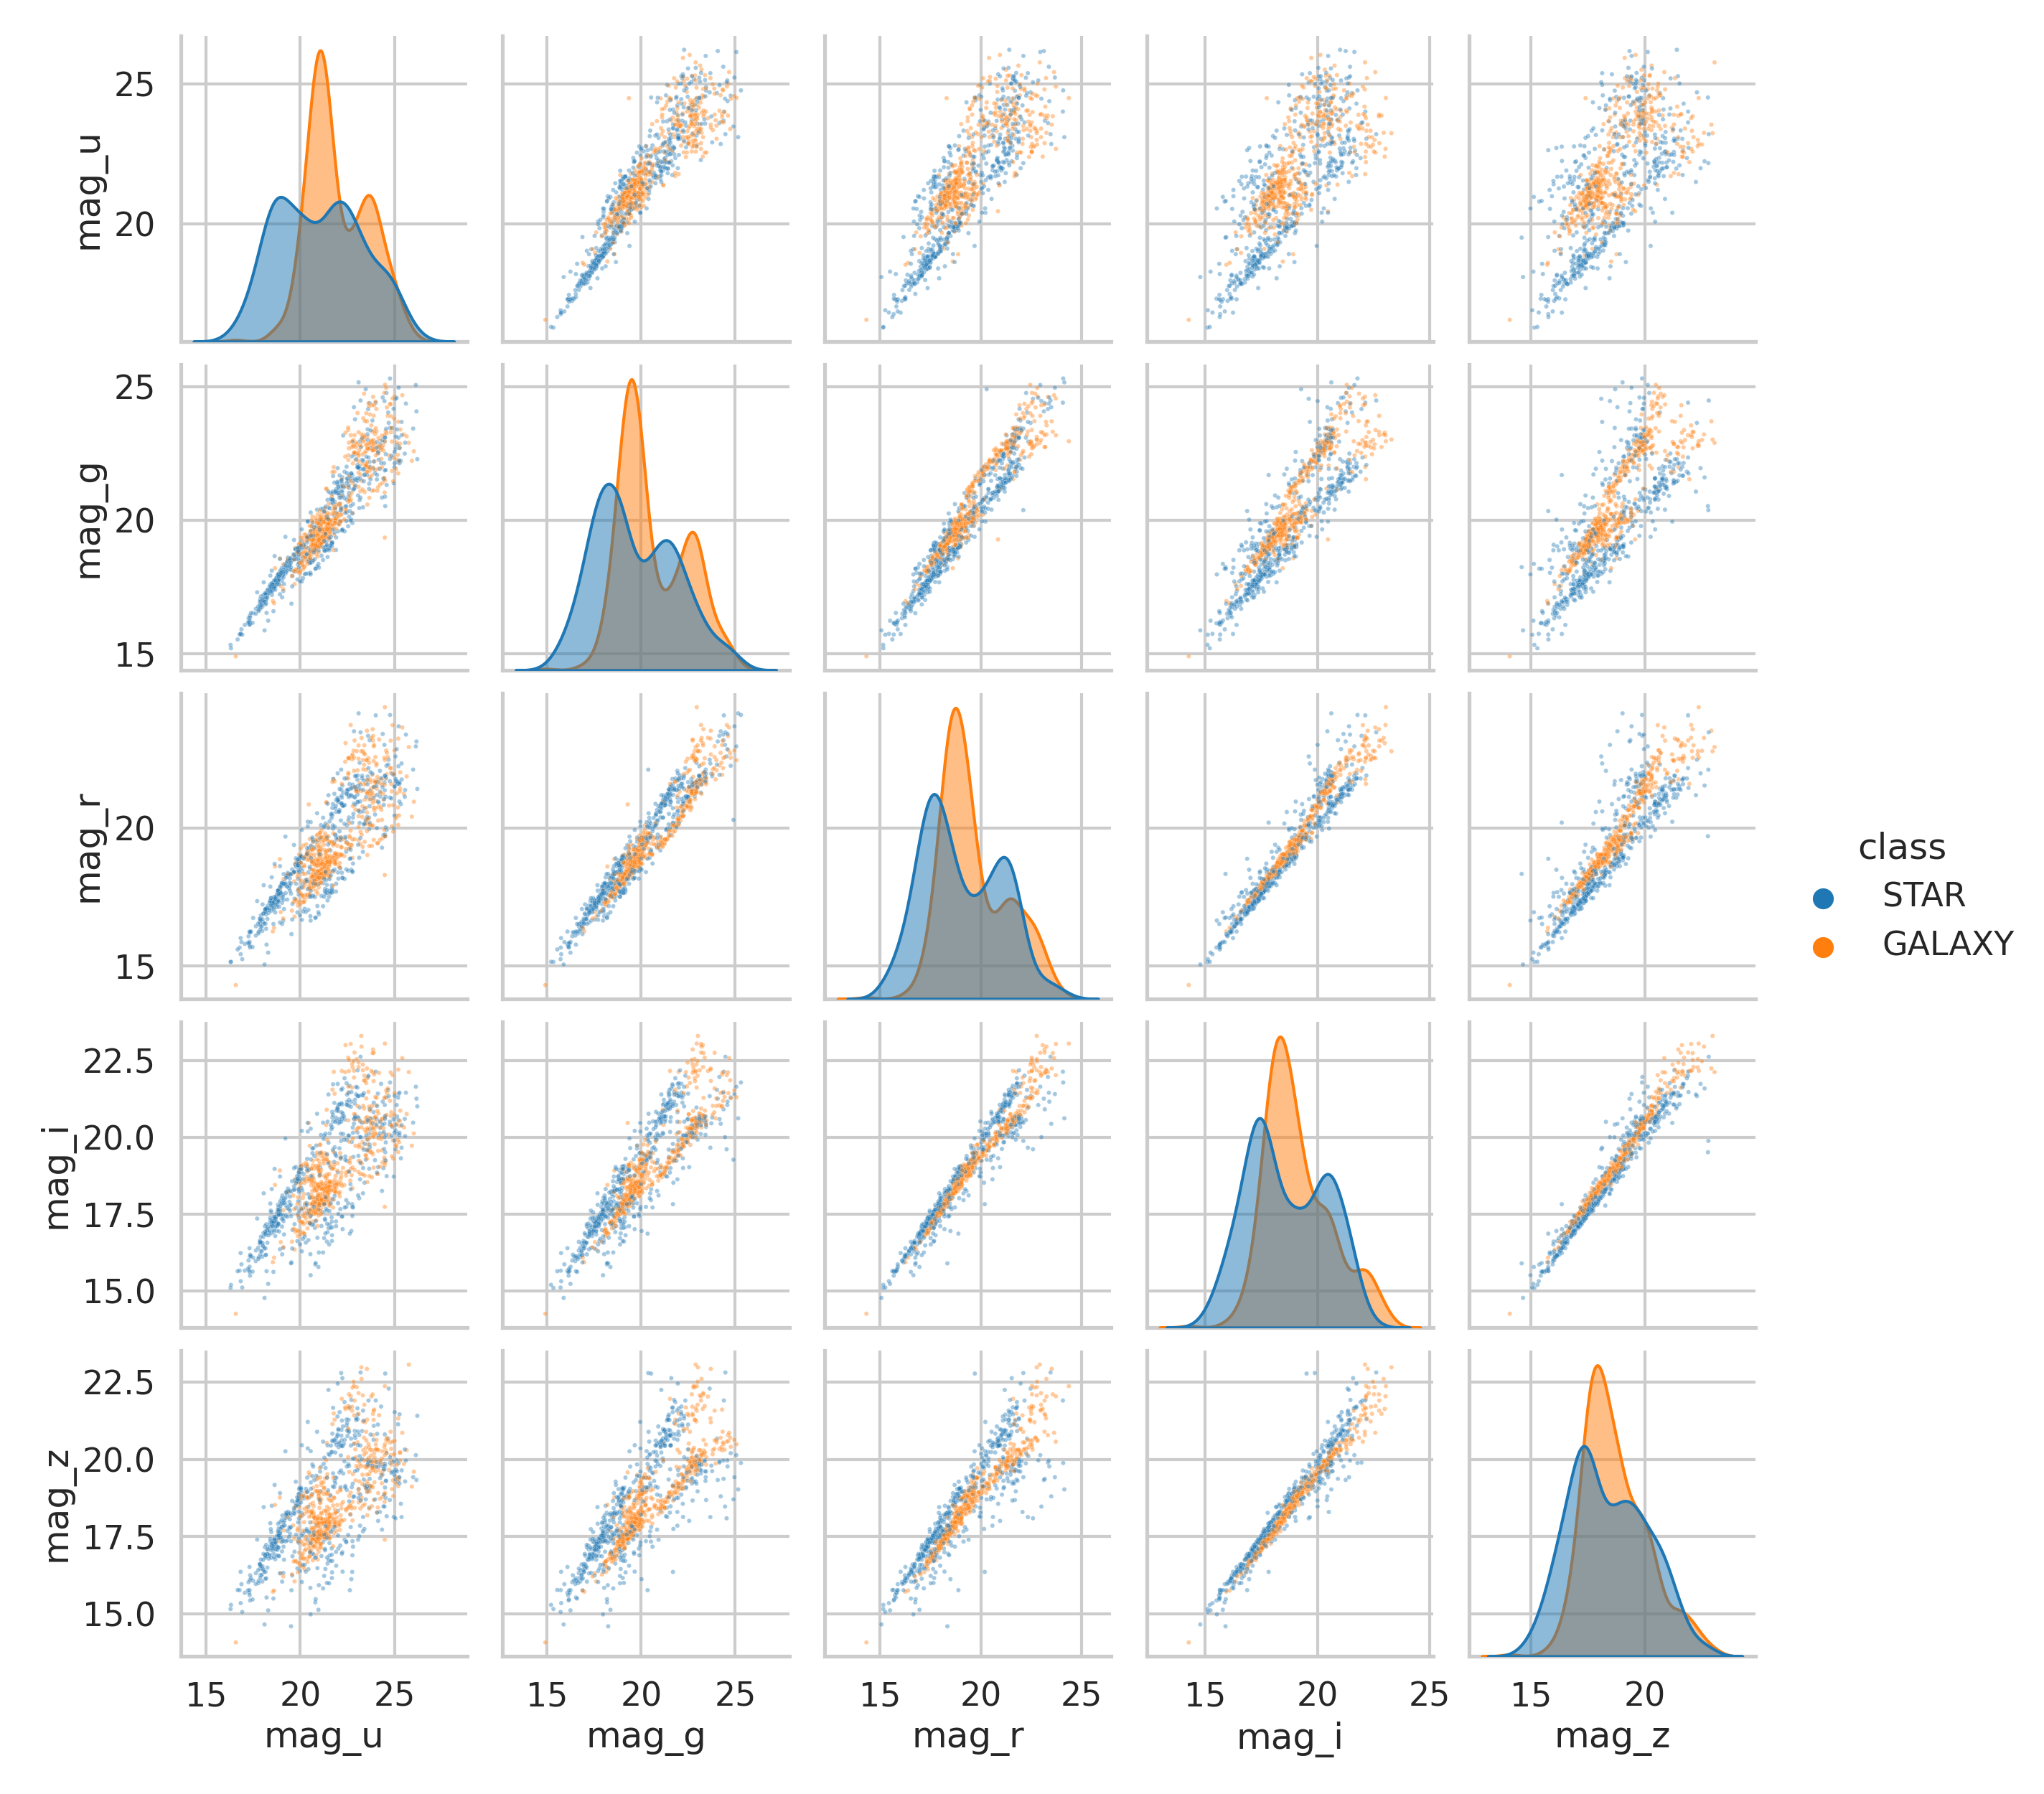

In [105]:
sns.pairplot(data.loc[:1000, ["mag_u", "mag_g", "mag_r", "mag_i", "mag_z", "class"]], 
             kind = "scatter", diag_kind="kde", hue="class",
             plot_kws={"s":5, "alpha":0.4}, diag_kws={"alpha":0.5})

Let's also make one for the colours:

<IPython.core.display.Javascript object>


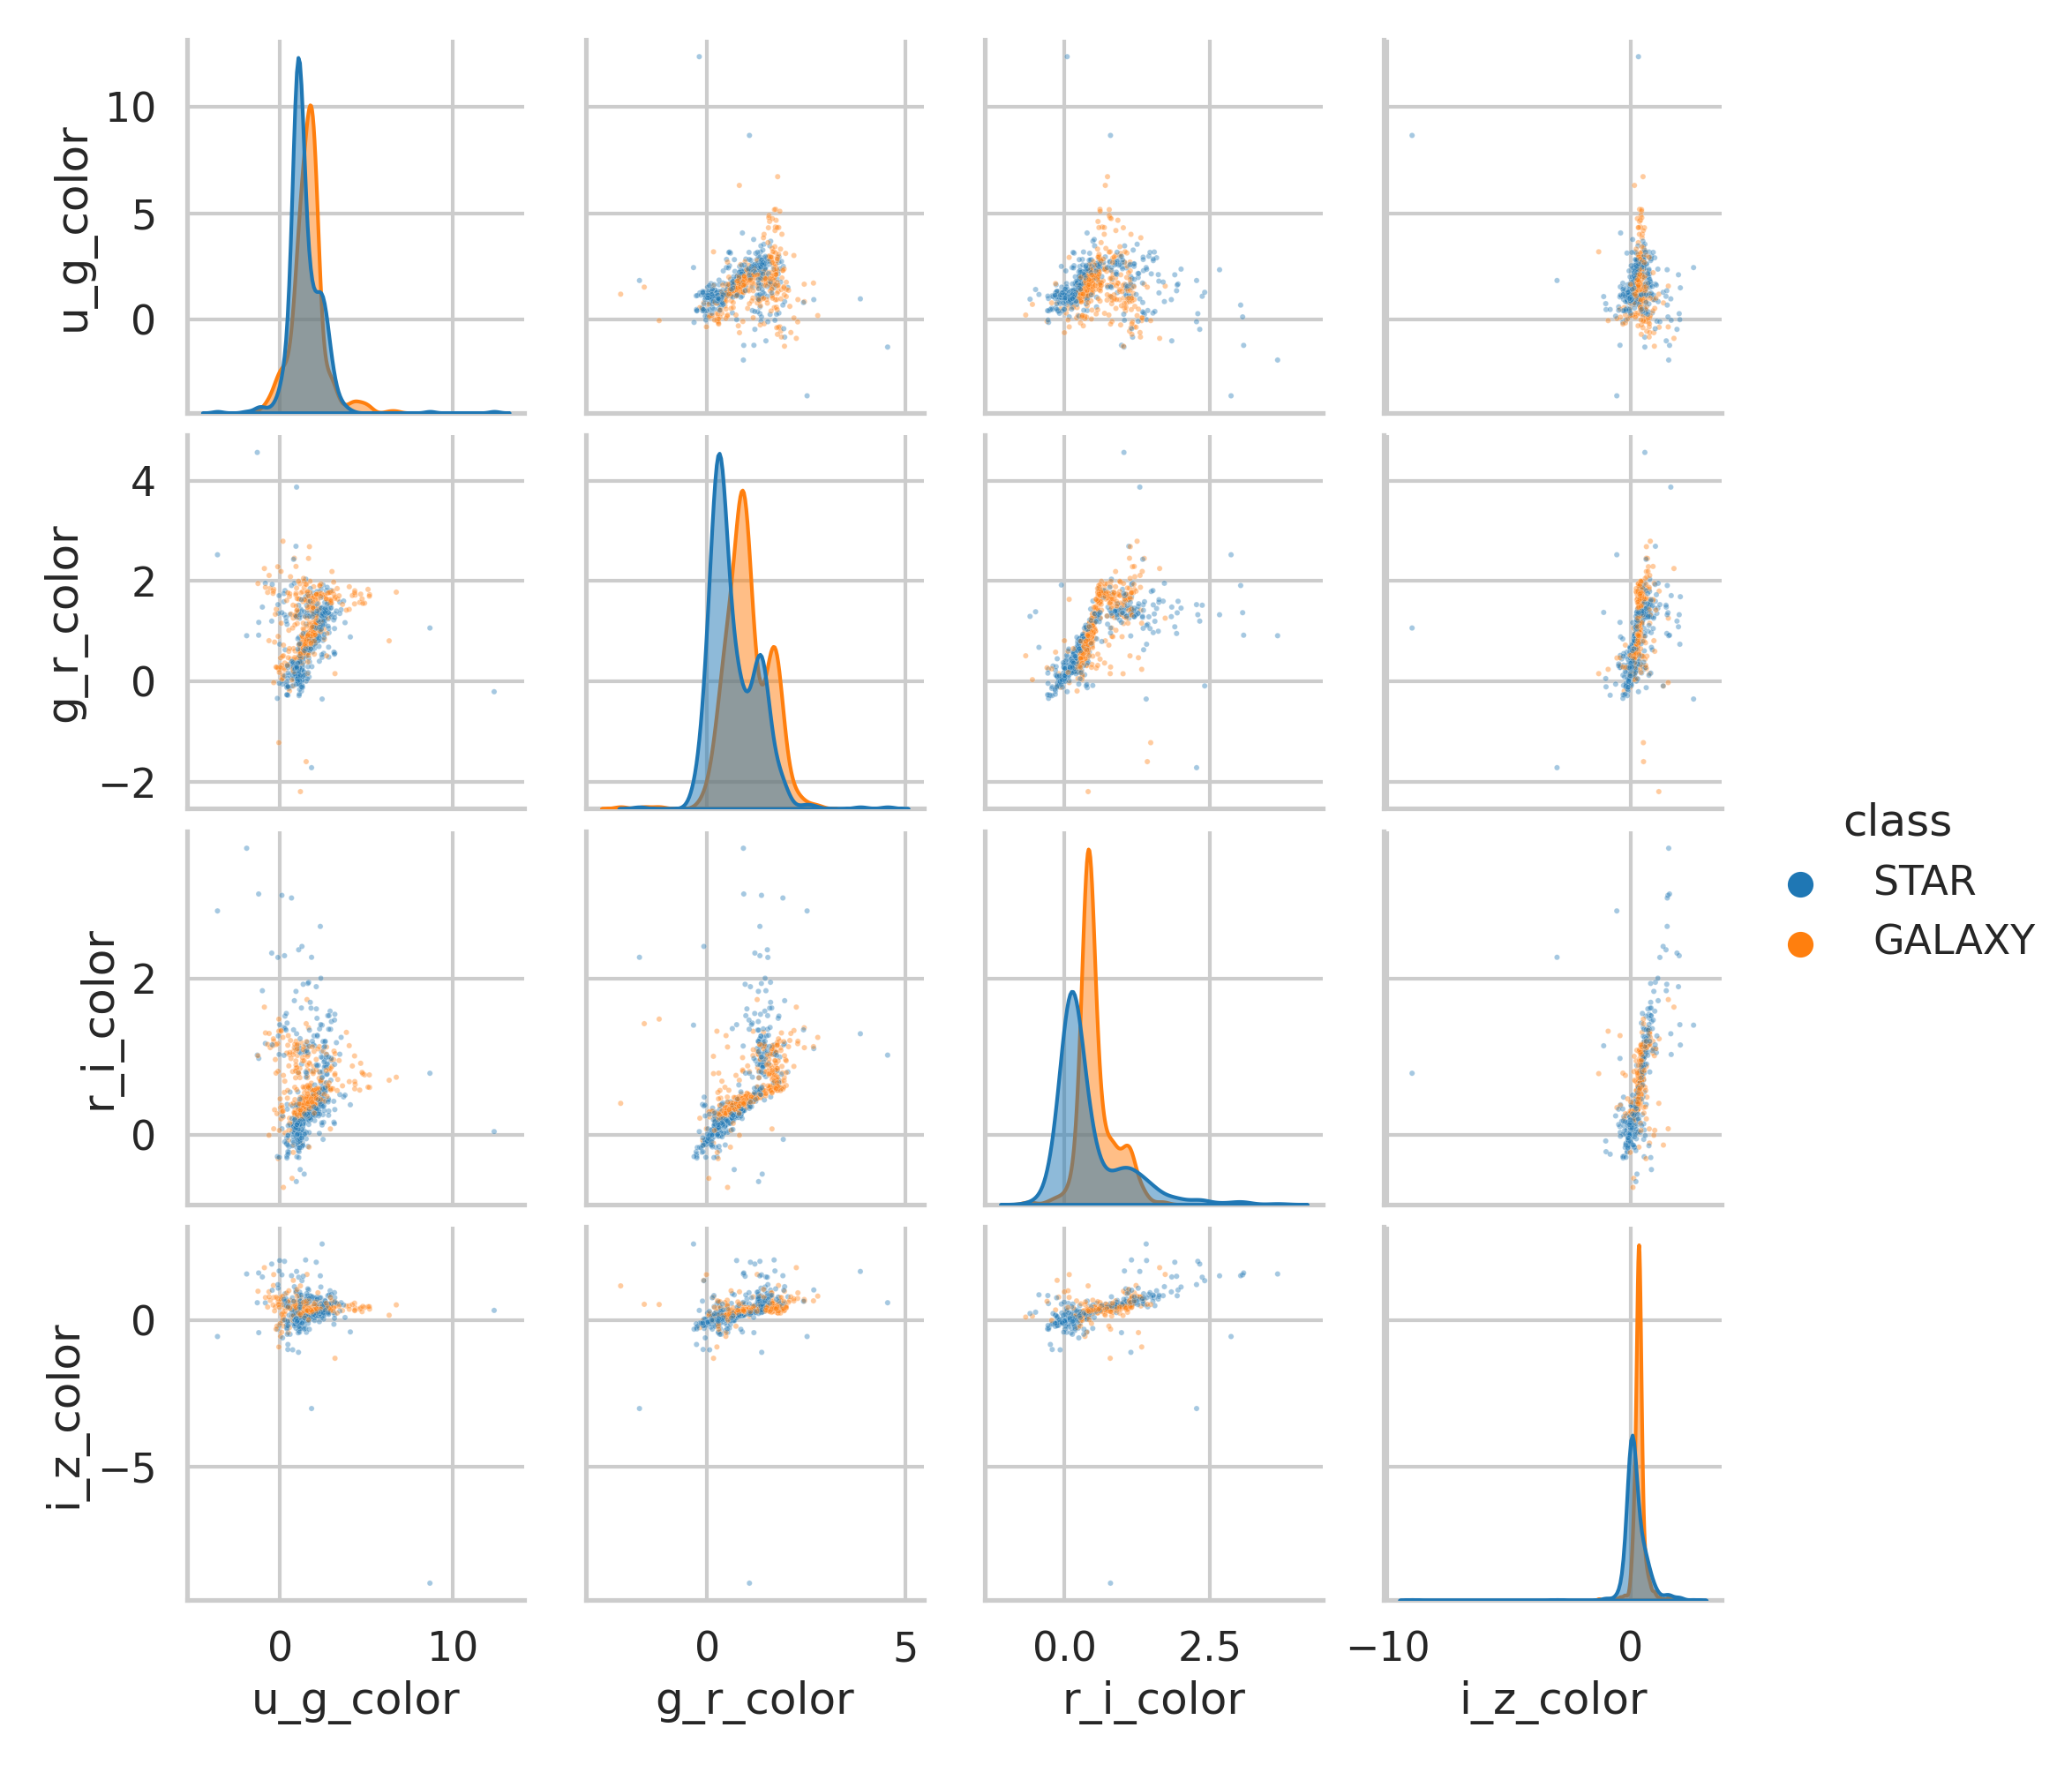

In [106]:
sns.pairplot(data.loc[:1000, ["u_g_color", "g_r_color", "r_i_color", "i_z_color", "class"]], 
             kind = "scatter", diag_kind="kde", hue="class",
             plot_kws={"s":5, "alpha":0.4}, diag_kws={"alpha":0.5})

You should see that there are values around -10000 for the colour and some of the magnitudes. This is because SDSS uses `-10000` as their placeholder for bad measurements, equivalent to the `NaN` ("not a number") you might see in other datasets. 

Let's remove all samples that have any -10000 value (there are ways to deal with missing data in machine learning, but we'll not learn about those today):

In [107]:
data_clean = data.loc[(data["mag_u"] > -1000) & (data["mag_r"] > -1000) & (data["mag_g"] > -1000) & (data["mag_i"] > -1000) & (data["mag_z"] > -1000)]

<IPython.core.display.Javascript object>


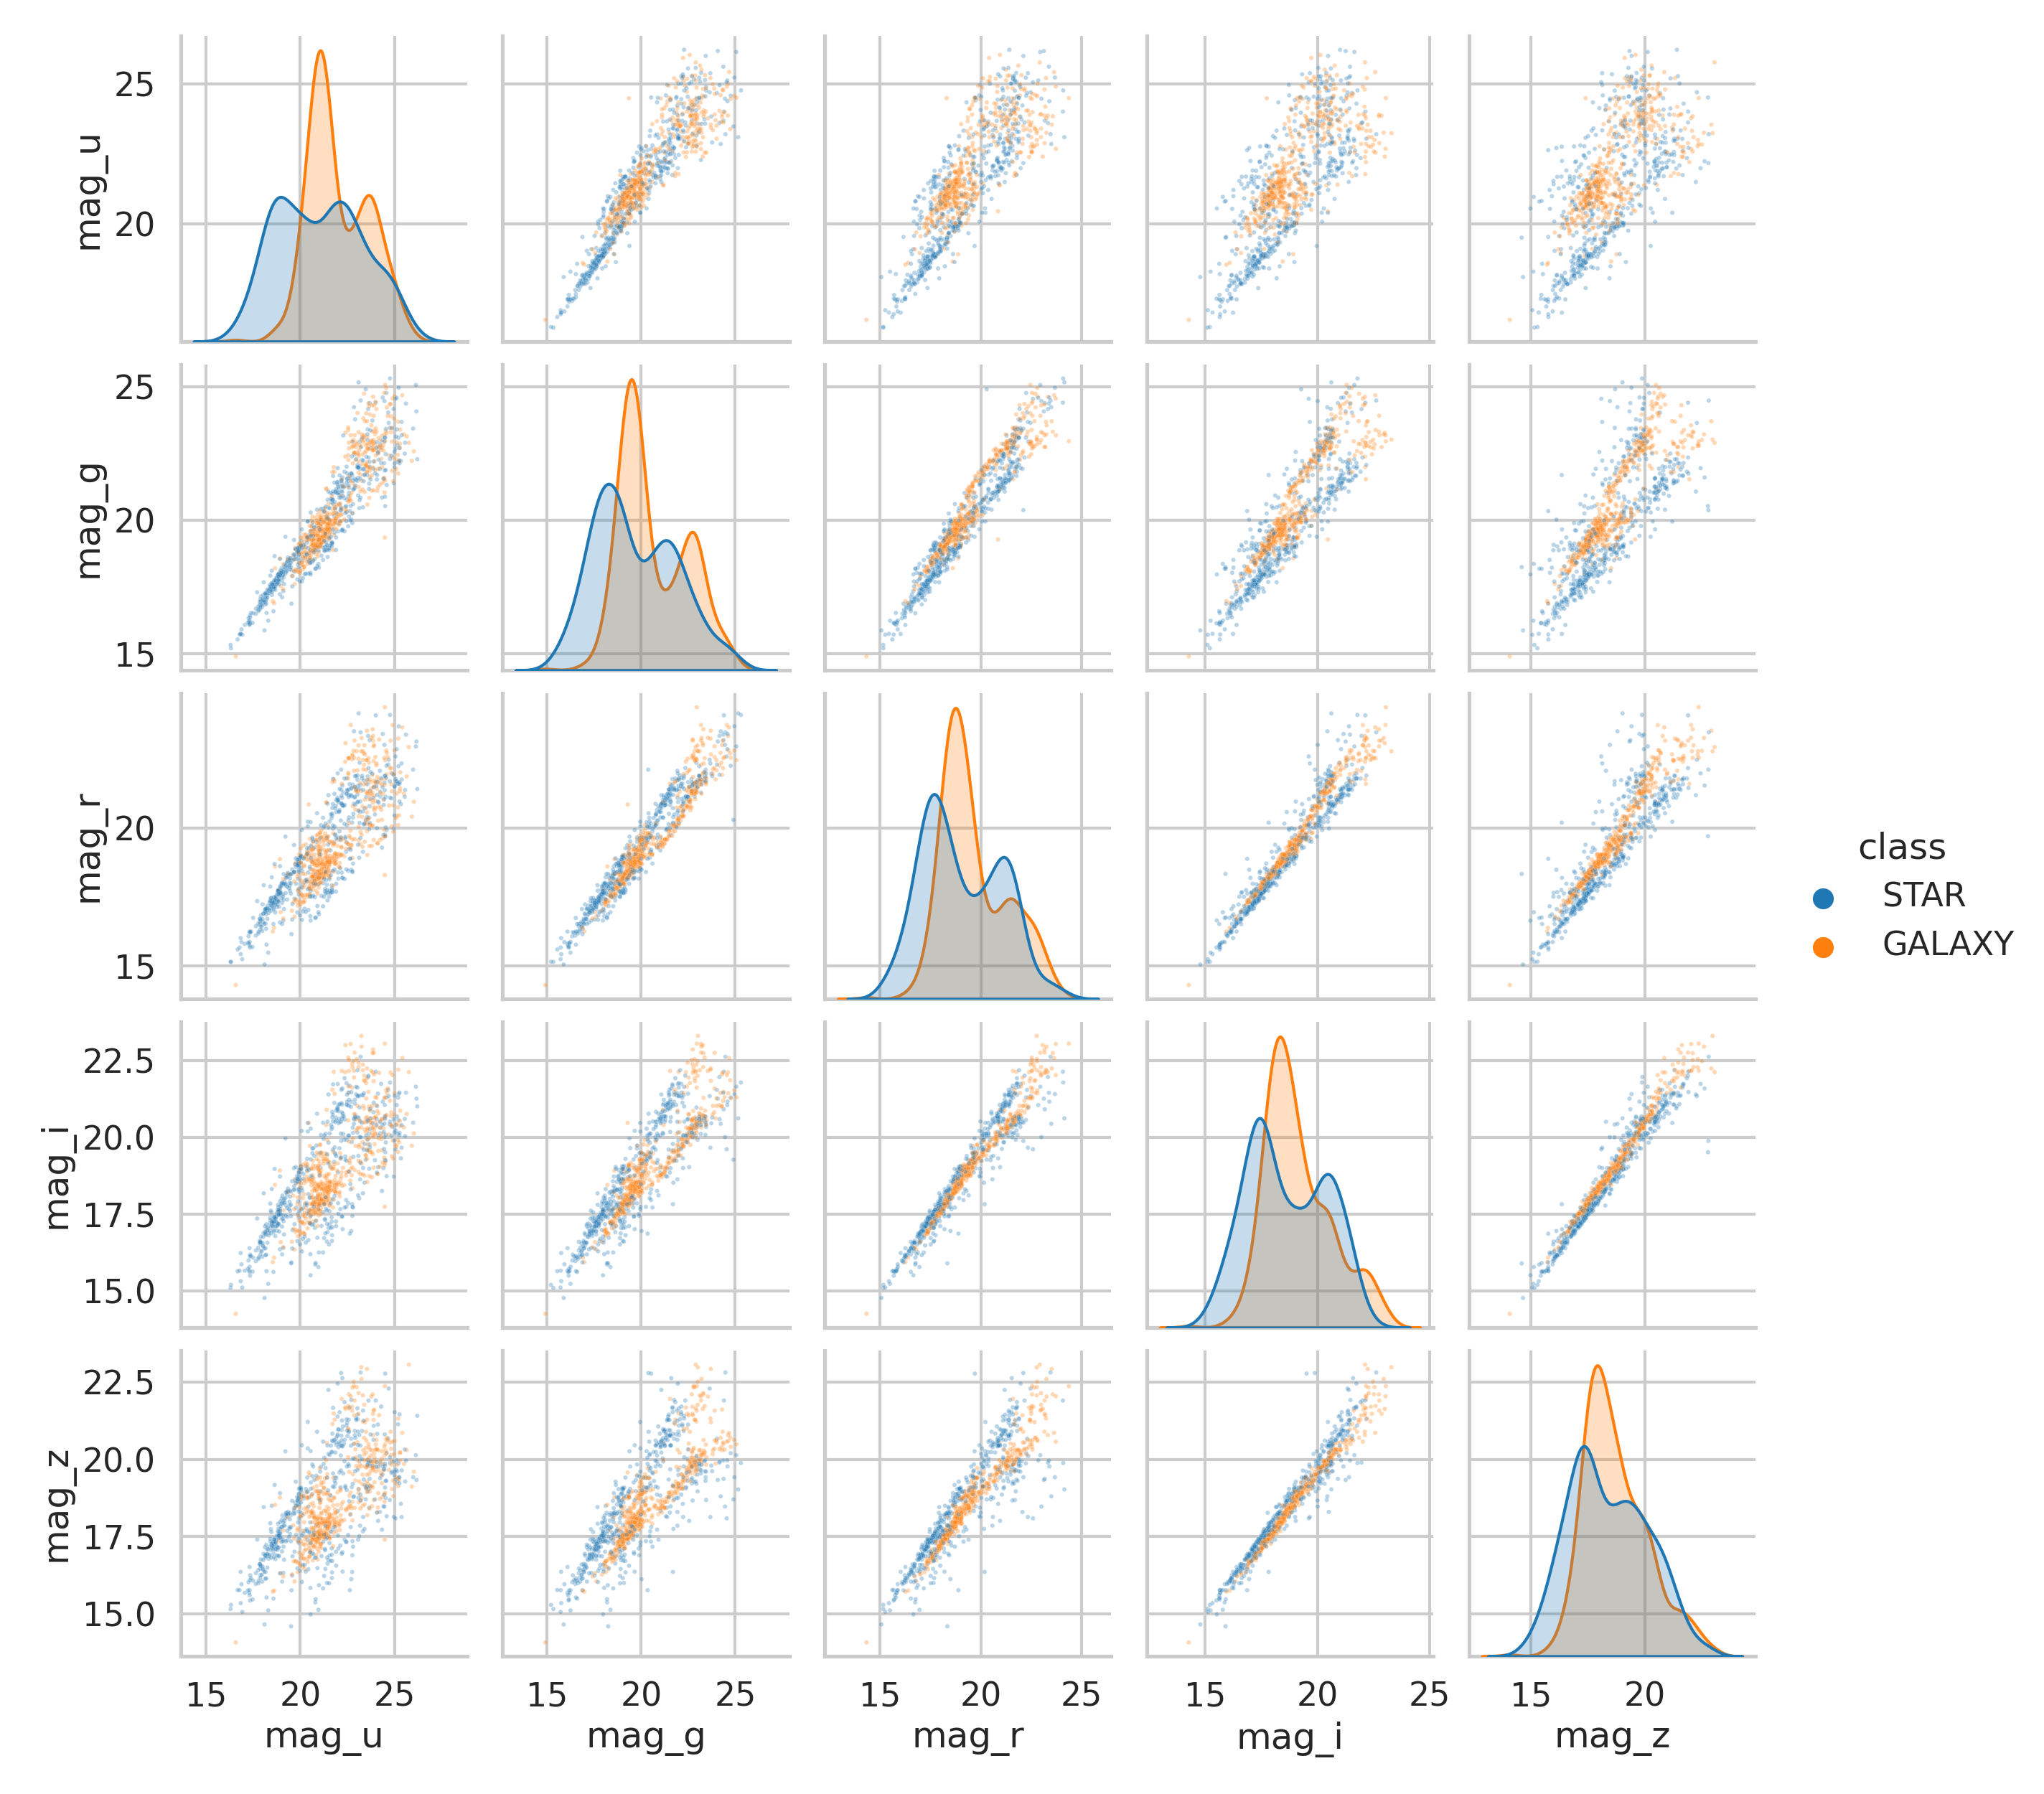

In [108]:
sns.pairplot(data_clean.loc[:1000, ["mag_u", "mag_g", "mag_r", "mag_i", "mag_z", "class"]], 
             hue="class", diag_kind="kde", plot_kws={"alpha":0.3, "s":5})

### Looking for Weird Things

One of the key tasks during this stage of your analysis is to *sanity-check* your data. Are there weird things? Instrumental artifacts? Things that don't look right? This is where you explore your data and try to find (and explain) these things, and potentially remove them before training.

Our star/galaxy data looks reasonably ok at this point, there are no longer any magnitudes that are wildly different from what we'd expect from either stars or galaxies in an optical survey like SDSS.



<IPython.core.display.Javascript object>


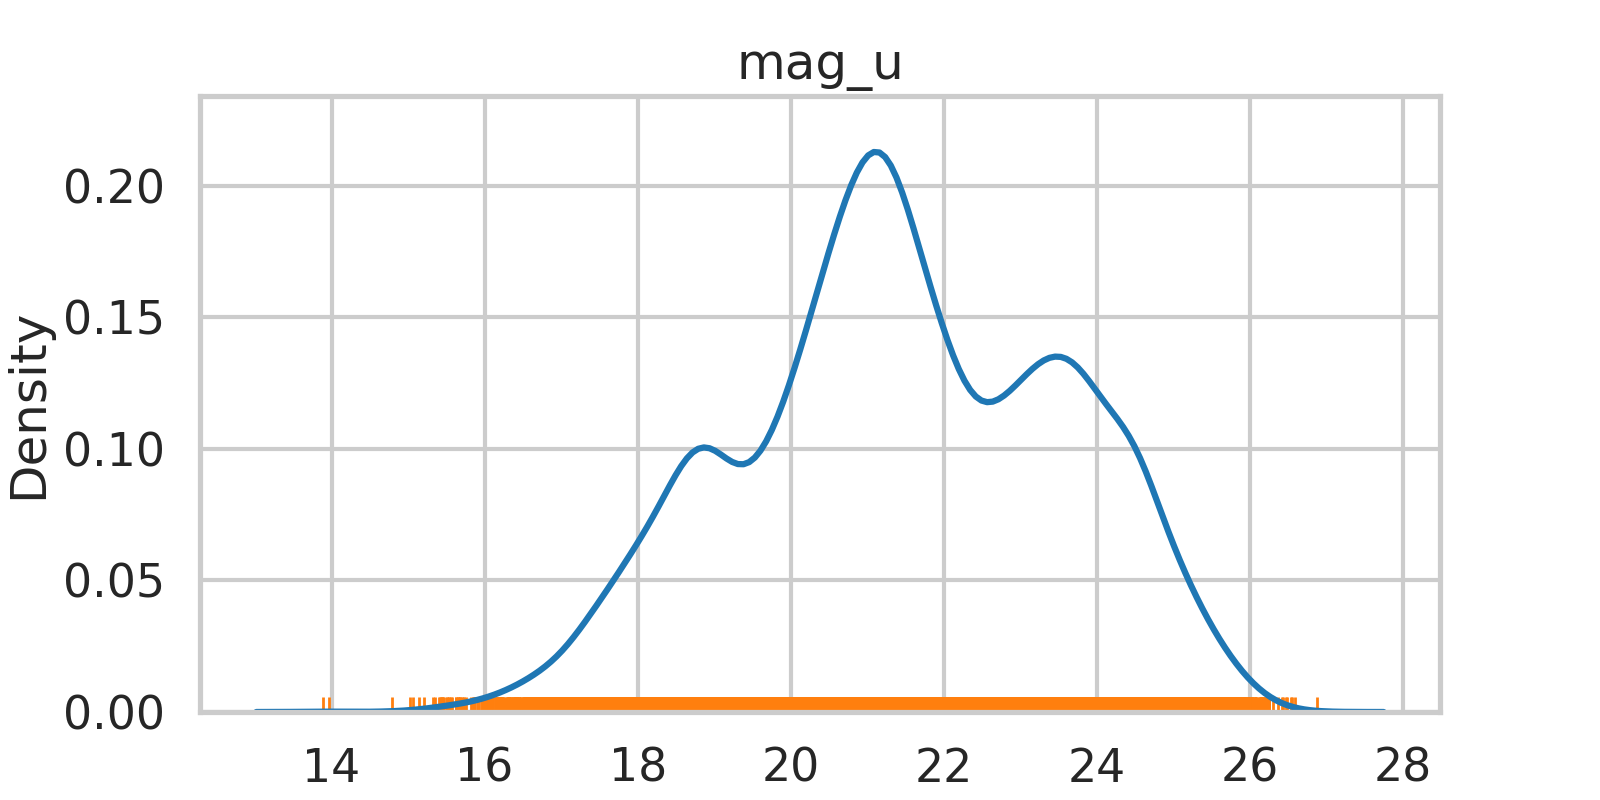

<IPython.core.display.Javascript object>


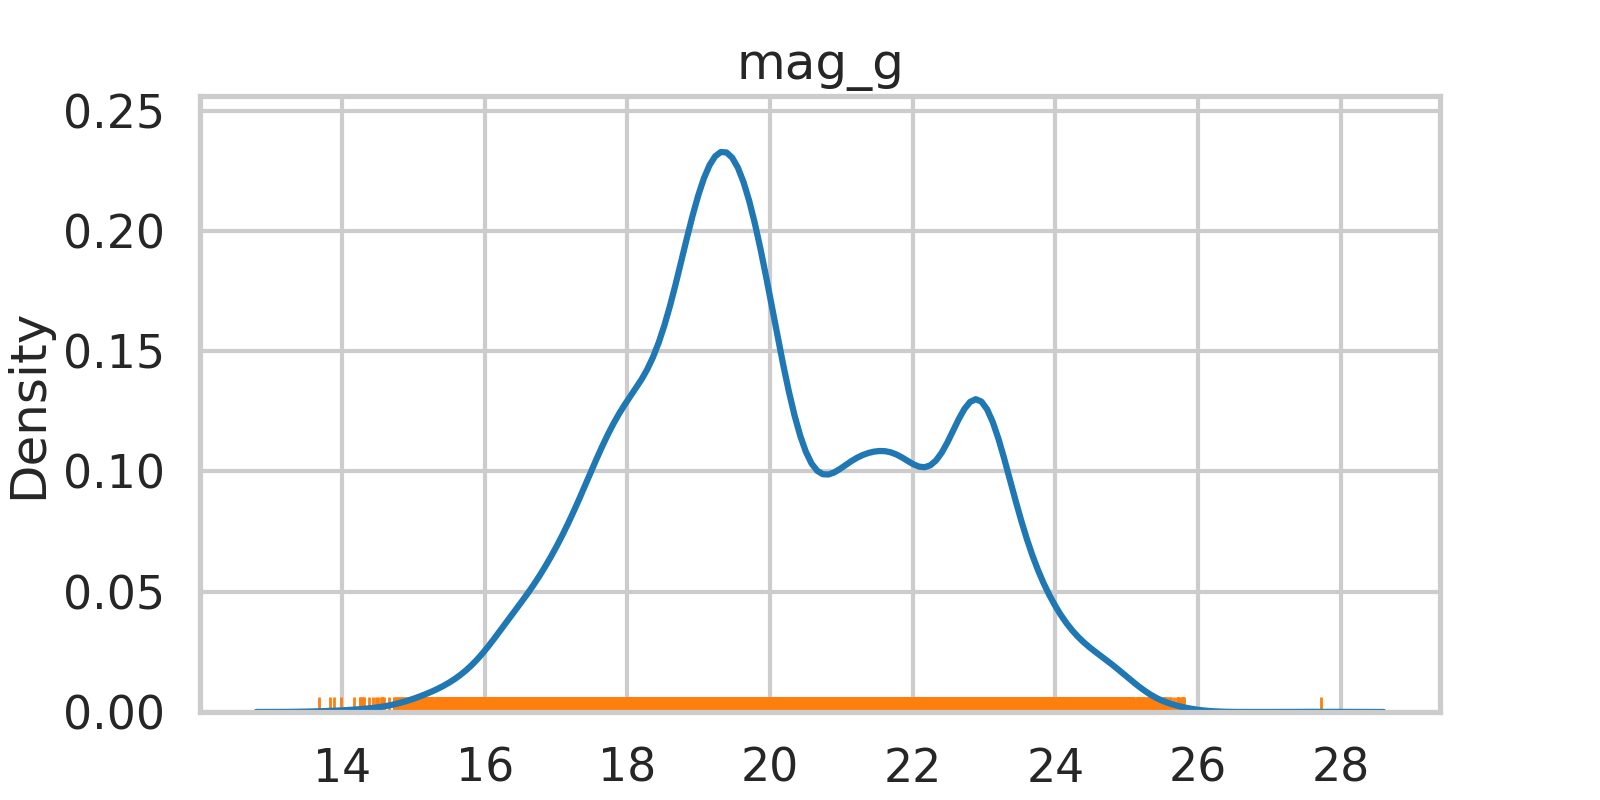

<IPython.core.display.Javascript object>


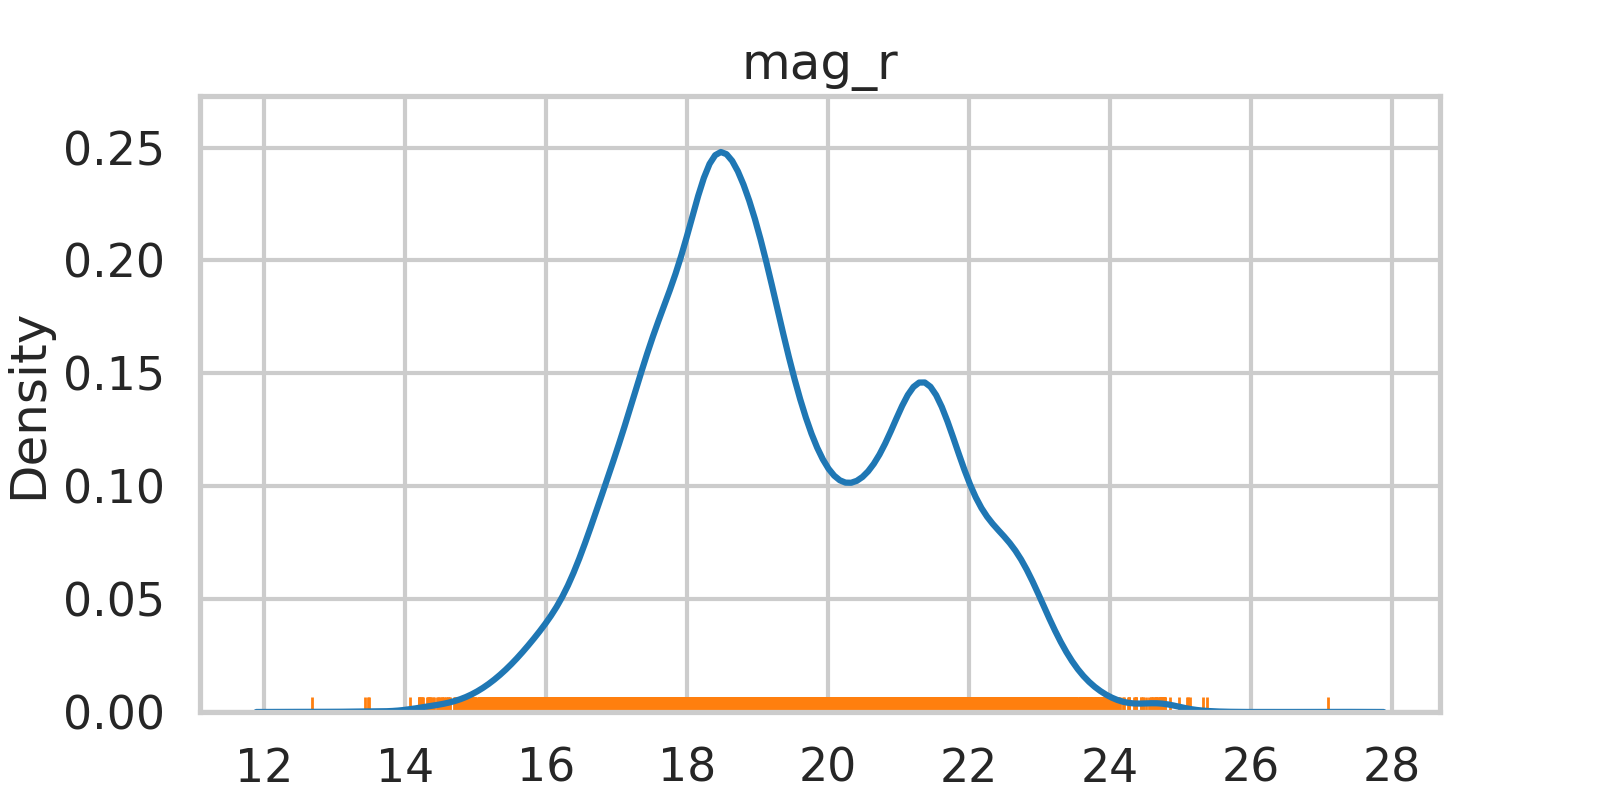

<IPython.core.display.Javascript object>


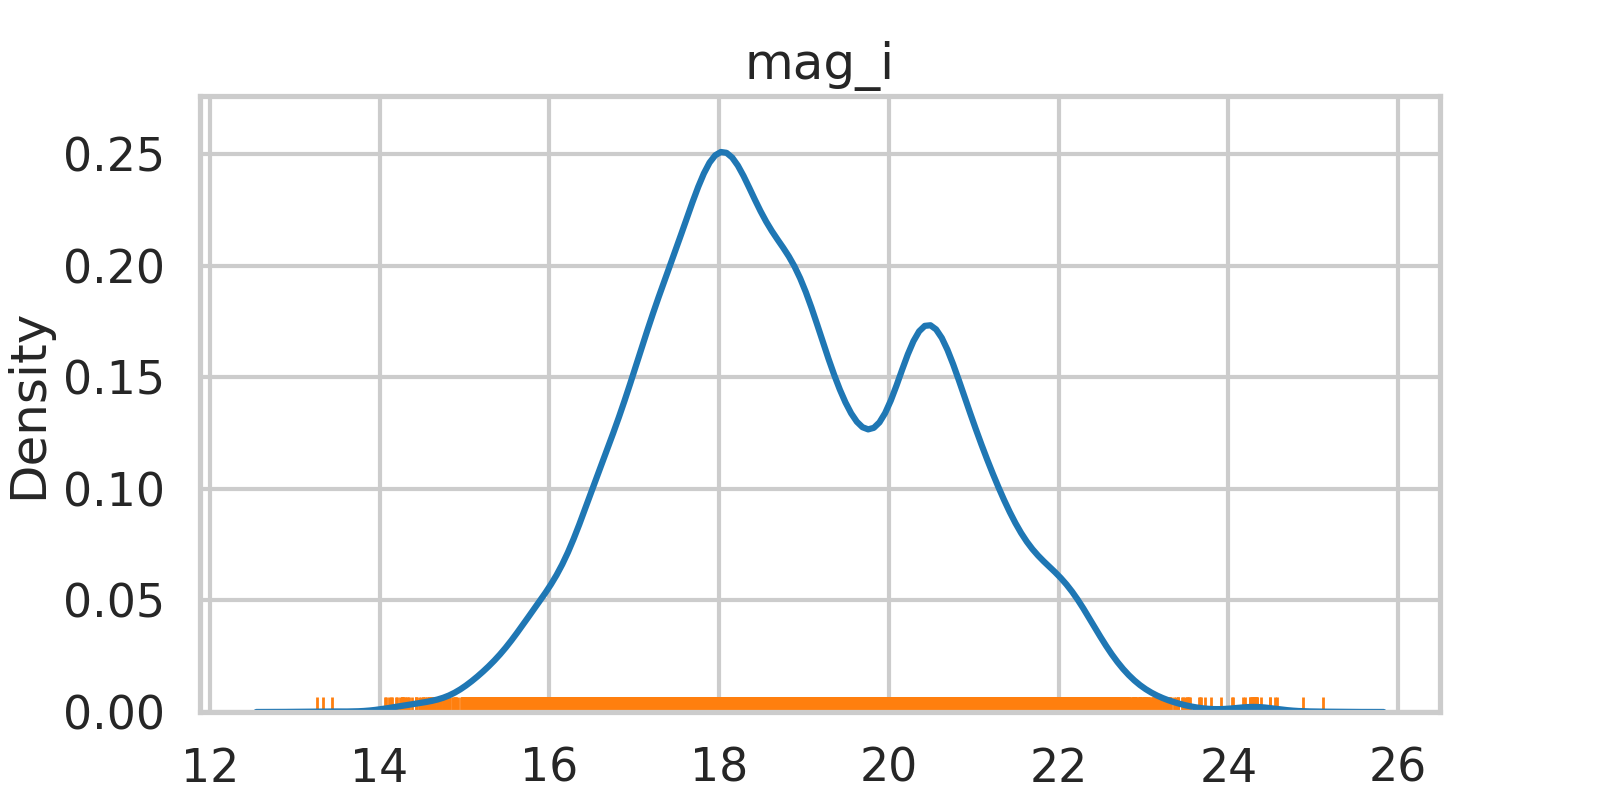

<IPython.core.display.Javascript object>


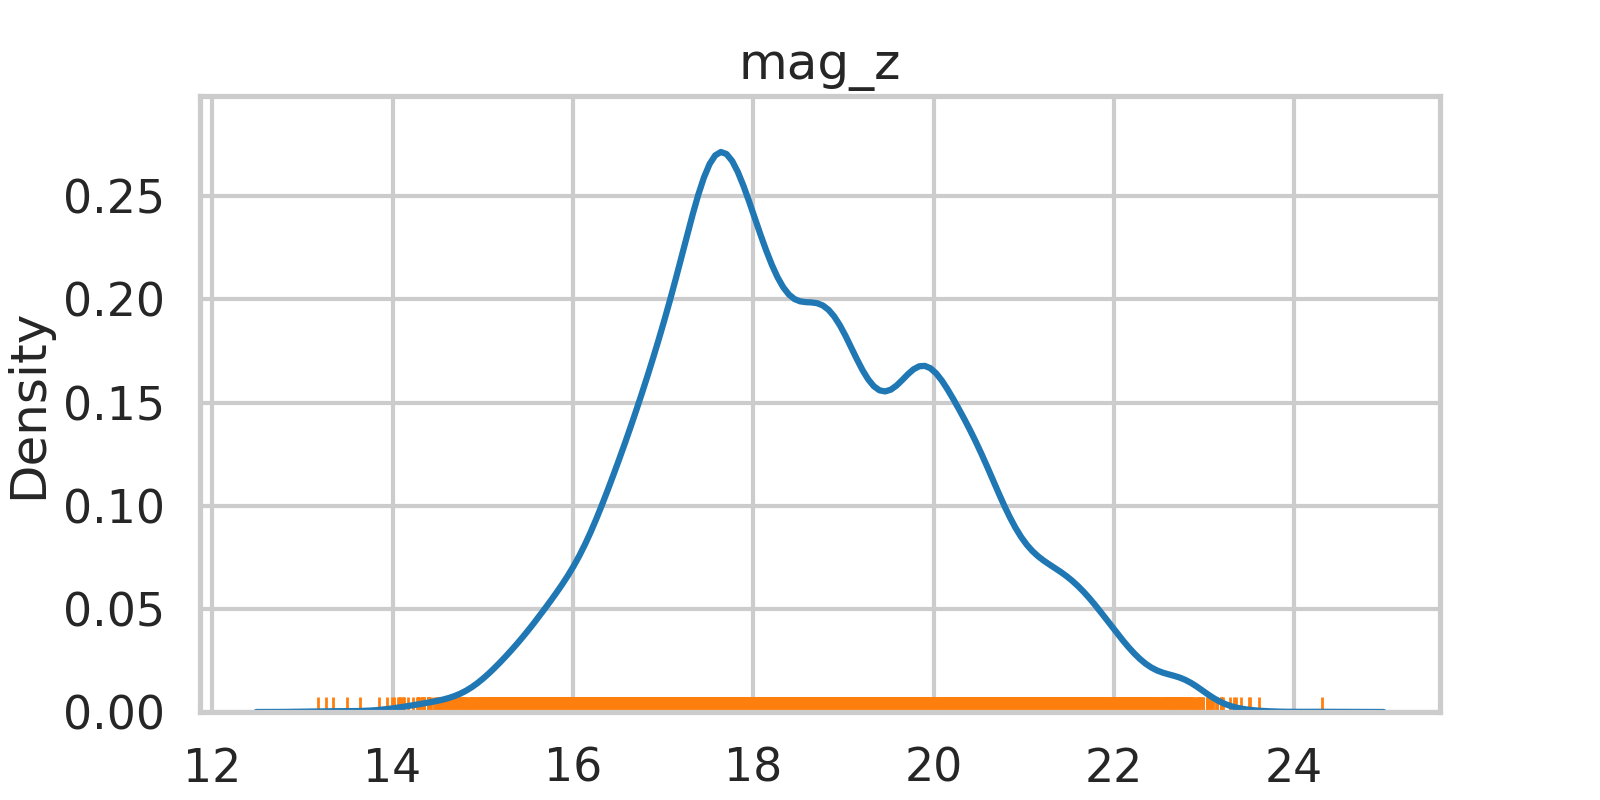

<IPython.core.display.Javascript object>


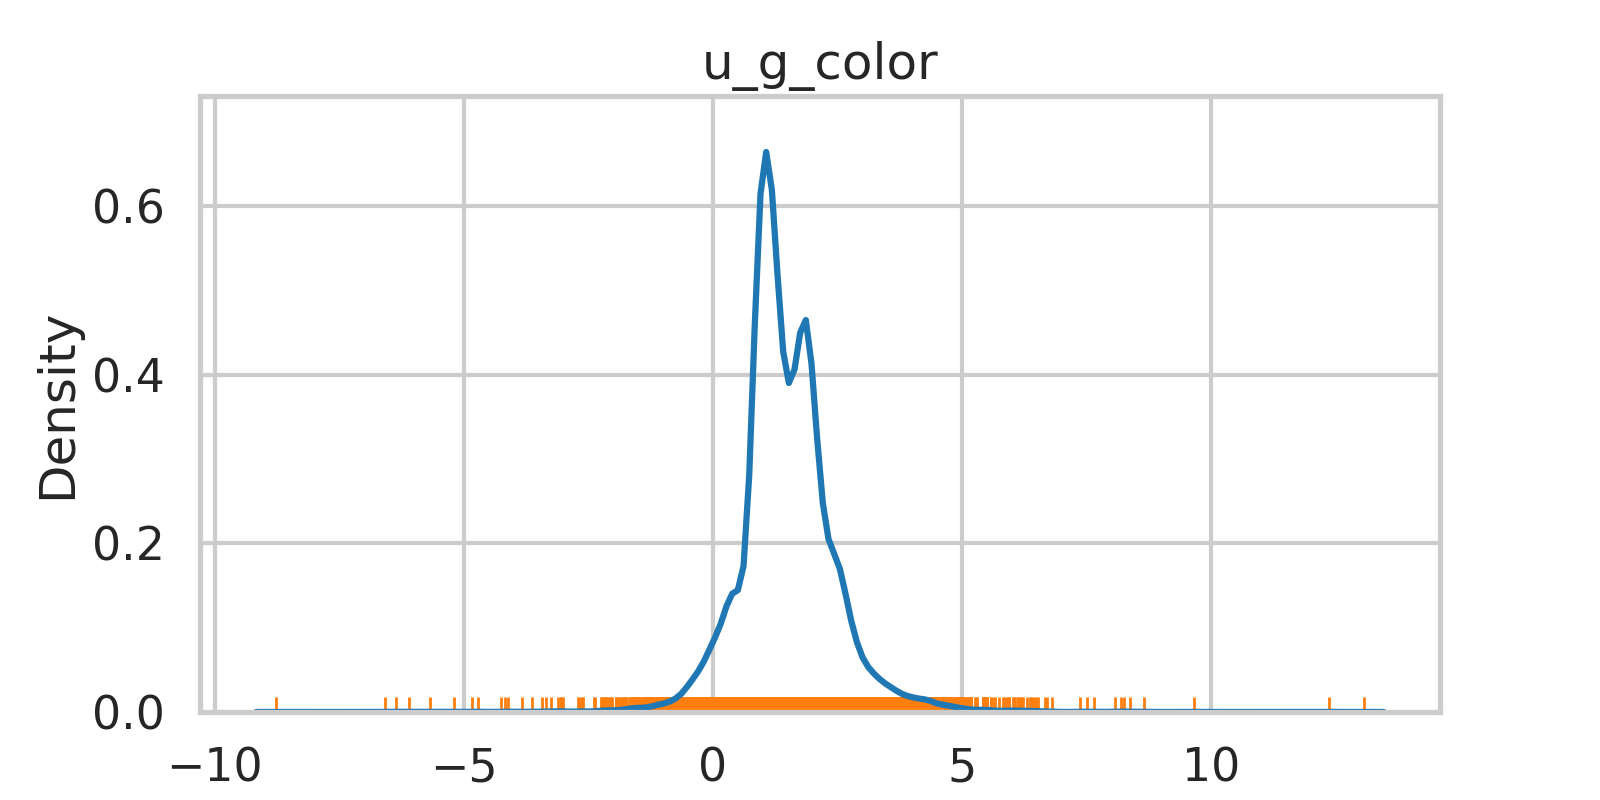

<IPython.core.display.Javascript object>


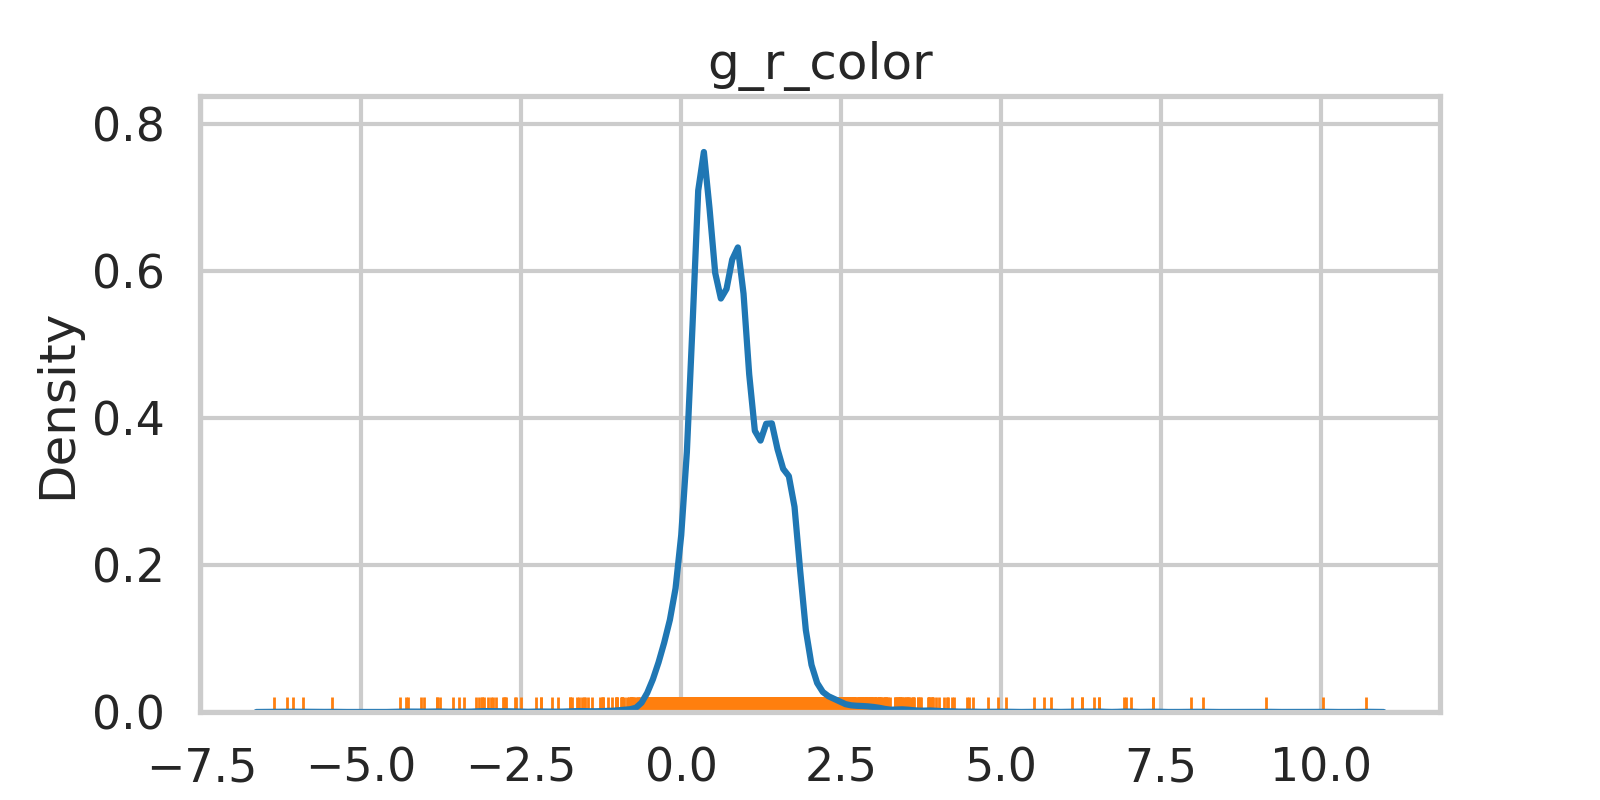

<IPython.core.display.Javascript object>


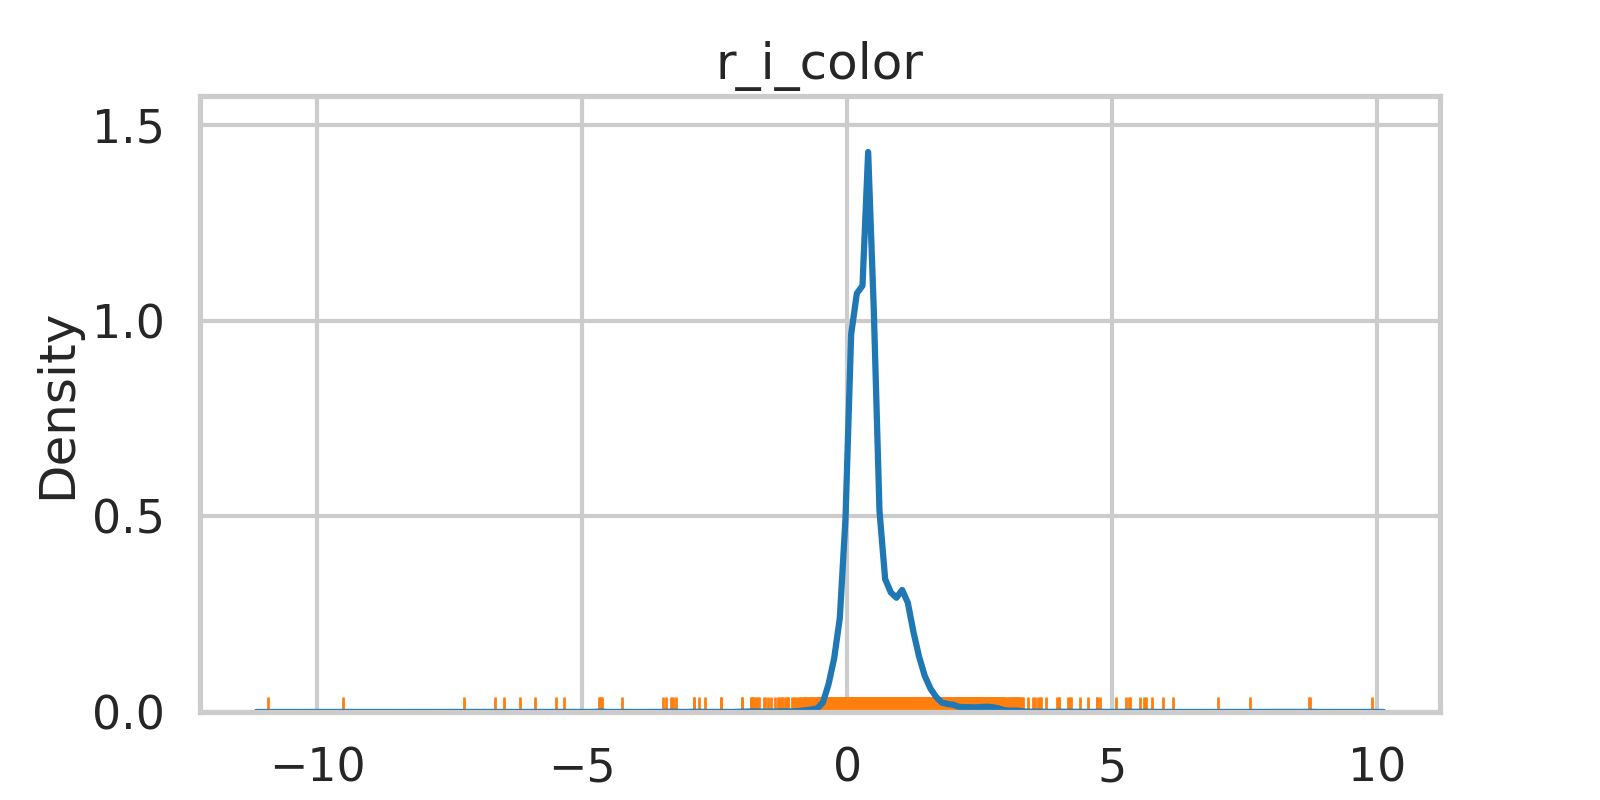

<IPython.core.display.Javascript object>


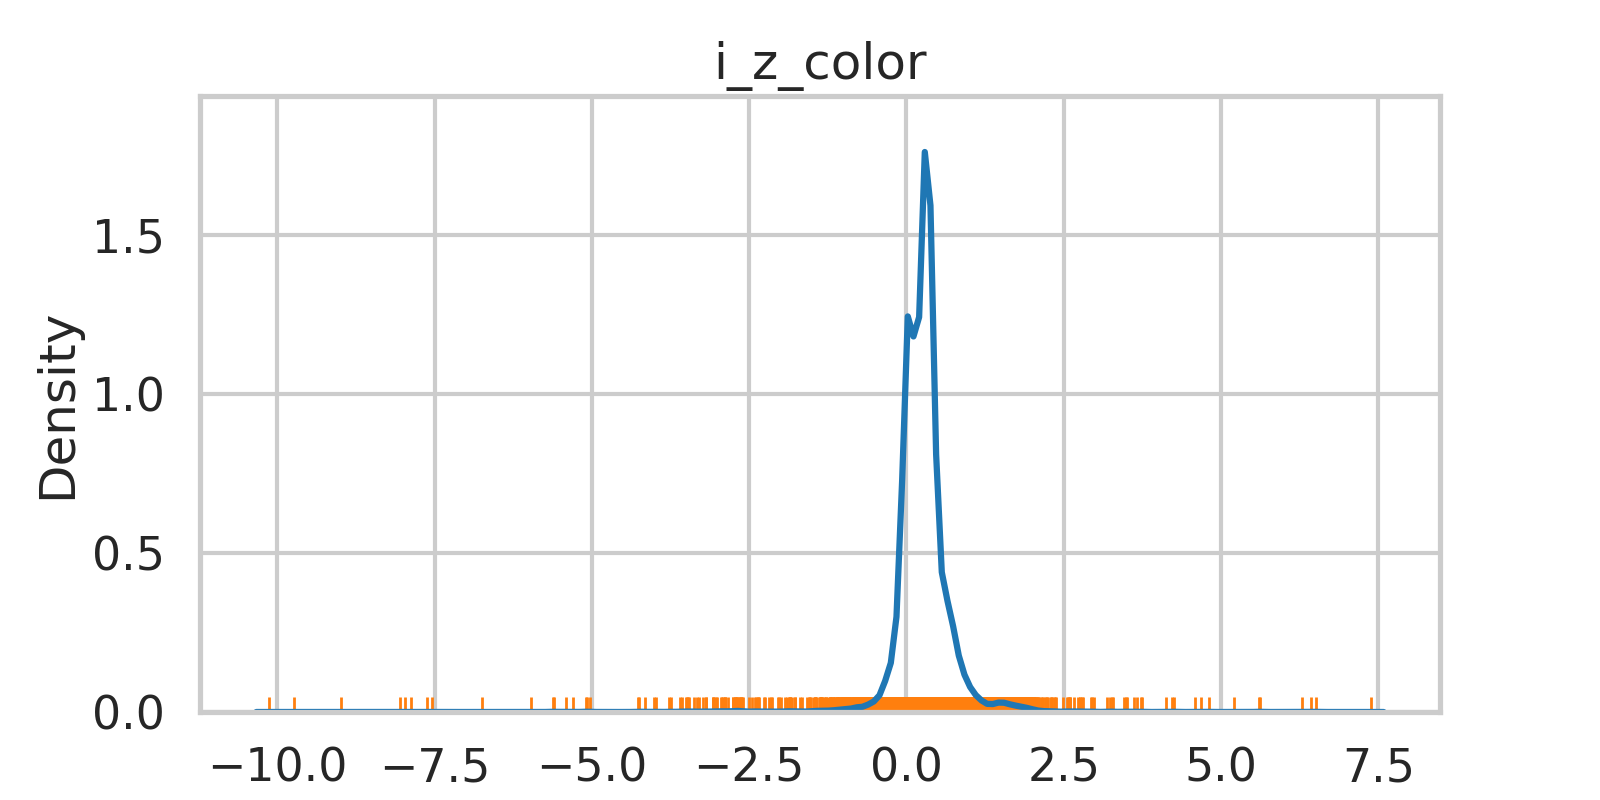

In [110]:
for c in data_clean.columns[:-1]:
    fig, ax = plt.subplots(1, 1, figsize=(8,4))
    
    sns.kdeplot(data=data_clean, x=c, ax=ax)
    sns.rugplot(data=data_clean, x=c, ax=ax)
    ax.set_title(c)

### Separate Out the Classes Again + Setting up training/testing splits

At this point, we should remove the 'class' column from the data again and set up our train/test splits. 

From now on, we'll *only* explore things on the training data, and ignore the test data until the very end.

Another important thing to think about is **stratification**: if your data set is very imbalanced, randomized splitting into training and test sets can lead to all examples of the smaller class ending up in one of the two sets, but not in both. Stratified splitting uses the class labels to ensure that examples of all classes end up in the training and test sets.



In [117]:
classes = data_clean["class"]

In [118]:
X_train, X_test, l_train, l_test = train_test_split(data_clean, classes, train_size=0.75, shuffle=True, stratify=None)
X_train = X_train.drop(["class"], axis=1)
X_test = X_test.drop(["class"], axis=1)


### Dimensionality Reduction

Another way to try and make sense of high-dimensional feature spaces is to perform *dimensionality reduction*. There are a lot of different ways to reduce the dimensionality of your features, and some are more useful than others, depending on the structure of your data and your problem. One idea with dimensionality reduction is to find the combination of features that gives you the most useful information in terms of your regression or classification problem. Some other times, all you want is a handy visualization in 2D, since humans in general aren't very good at thinking in higher-dimensional spaces.

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is one of the most straightforward ways of reducing dimensionality (see also [here](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) for alternative methods implemented in scikit-learn). One useful thing to try might be to project your features into a smaller space and see whether you still capture the information relevant in order to perform a good classification or regression.

**Exercise**: Use PCA to project your features into 2 dimensions, and compare with the full data space. Do you think most of the information in your features is captured by the 2D representation? 

**Hint**: The `fit_transform` method will come in handy here.

**Solution**: PCA is implemented in scikit-learn's `sklearn.decomposition` submodule:

In [119]:
from sklearn.decomposition import PCA

In [120]:
pca = PCA(n_components=2, whiten=True)

In [121]:
X_train

mag_u     mag_g     mag_r     mag_i     mag_z  u_g_color  g_r_color  \
8242   20.21383  19.05497  18.66219  18.31866  18.15481   1.169439   0.431742   
13922  21.29016  19.53884  18.44168  18.01215  17.63010   1.797623   0.977156   
17594  21.96156  21.22860  20.45163  19.95374  19.50097   0.714889   0.797361   
19837  17.15875  16.21918  15.93350  15.80858  15.77365   0.972591   0.267152   
2457   19.54597  17.90451  17.06725  16.82177  16.46921   1.731054   0.748537   
...         ...       ...       ...       ...       ...        ...        ...   
17521  23.00982  21.69619  21.65599  21.57299  21.51452   1.448494   0.060255   
17978  21.32704  20.08570  19.65509  19.45108  19.35548   1.326721   0.403311   
5608   18.01558  17.03275  16.67010  16.53015  16.49728   0.980248   0.359968   
19904  20.25364  19.15092  19.14941  19.17917  19.33621   1.089212  -0.014912   
13577  24.79660  22.82024  21.43226  20.50606  20.19141   3.260345   1.549807   

       r_i_color  i_z_color  
8242    0.295218   0.128944  
13922   0.429779   0.352968  
17594   0.502924   0.425878  
19837   0.120274   0.035247  
2457    0.368338   0.298145  
...          ...        ...  
17521   0.040451  -0.003353  
17978   0.235241   0.096685  
5608    0.140079   0.028521  
19904  -0.038166  -0.168804  
13577   1.005531   0.216694  

[14985 rows x 9 columns]

In [122]:
dered_labels = ["dered_u", "dered_g", "dered_i", "dered_z"]
mag_labels = ["mag_u", "mag_g", "mag_i", "mag_r", "mag_z"]
color_labels = ["u_g_color", "g_r_color", "r_i_color", "i_z_color"]

In [123]:
f_pca = pca.fit_transform(X_train[color_labels])

<IPython.core.display.Javascript object>


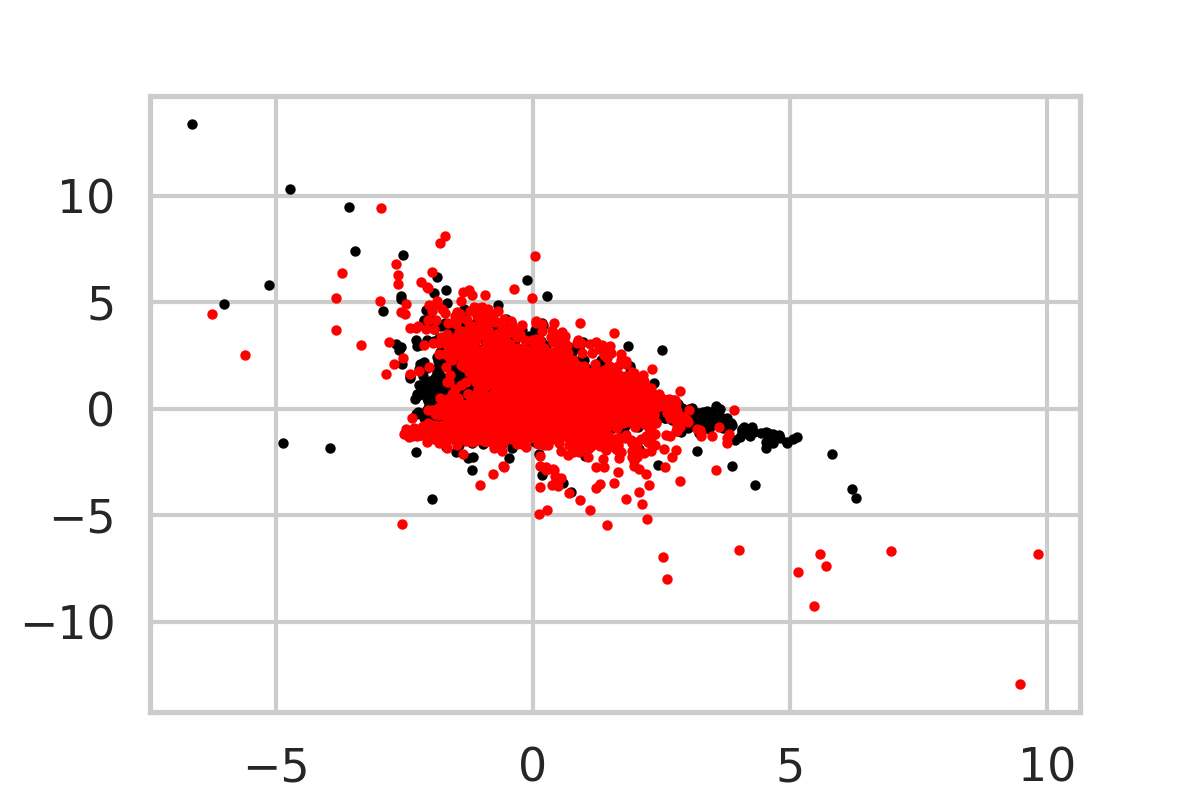

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.scatter(f_pca[(l_train == "GALAXY"), 0], f_pca[(l_train == "GALAXY"), 1], s=5, color="black")
ax.scatter(f_pca[(l_train == "STAR"), 0], f_pca[(l_train == "STAR"), 1], s=5, color="red")

Another way to visualize high-dimensional data is called *t-distributed stochastic neighbour embedding*, or, for short, t-SNE. [The paper](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) is surprisingly readable for a computer science paper, and the method is generally pretty good at visualizing complex feature spaces (and you can spend some entertaining minutes letting your brain find fun things in the patterns it produces). 

One thing you have to be aware of, however, is that t-SNE *does not generalize to new examples*. Wheras methods like PCA can be trained on some data, and then the trained model applied to new samples, this is *not true* for t-SNE. So this is a method that's useful for visualization, but it doesn't necessarily produce features you want to use in your classification. Note that t-SNE is generally quite a slow algorithm, so running this on very large data sets might leave you waiting for a while!

**Exercise**: Let's try it out! Visualize your feature space in 2 dimensions using t-SNE (hint: this is also implemented in scikit-learn).

**Solution**:

In [125]:
from sklearn.manifold import TSNE

In [126]:
ts = TSNE(n_components=2)

In [127]:
f_tsne = ts.fit_transform(X_train)

<IPython.core.display.Javascript object>


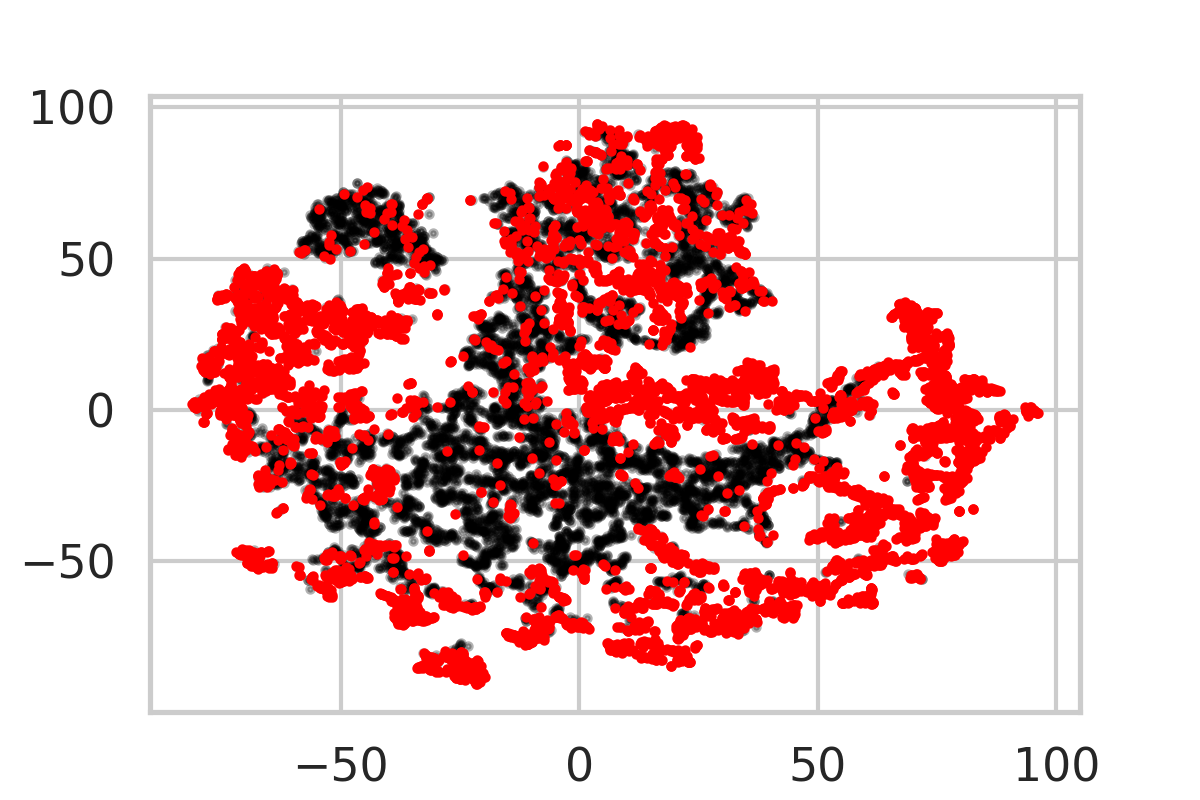

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.scatter(f_tsne[(l_train == "GALAXY"), 0], f_tsne[(l_train == "GALAXY"), 1], s=5, color="black", alpha=0.3)
ax.scatter(f_tsne[(l_train == "STAR"), 0], f_tsne[(l_train == "STAR"), 1], s=5, color="red")

### Scaling Features

Sometimes, your features vary wildly in order of magnitude. You may have photometric magnitudes that all lie between 13 and 20, but maybe you have a feature that's between 1 and 1,000,000, so that your different dimensions have vastly different scales. Some algorithms (e.g. random forests) can deal with that pretty well, but others can't. It's worth knowing enough about the algorithms you use whether they will deal with this kind of issue or not. If the method can't, one common solution is to re-scale the features such that they all have a mean of zero and a variance of one. 

Scikit-learn has a few ways of scaling features and other potentially useful steps for pre-processing data. Take a look at [this tutorial](http://scikit-learn.org/stable/modules/preprocessing.html). 

**Exercise**: Do you think scaling will help in your problem? Try scaling your features and re-running the PCA and t-SNE algorithms. Did your results change?

**Solution**:

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
sc = StandardScaler()

In [132]:
X_scaled = sc.fit_transform(X_train)

In [133]:
X_pca_sc = pca.fit_transform(X_scaled)

In [136]:
X_tsne_sc = ts.fit_transform(X_scaled)

<IPython.core.display.Javascript object>


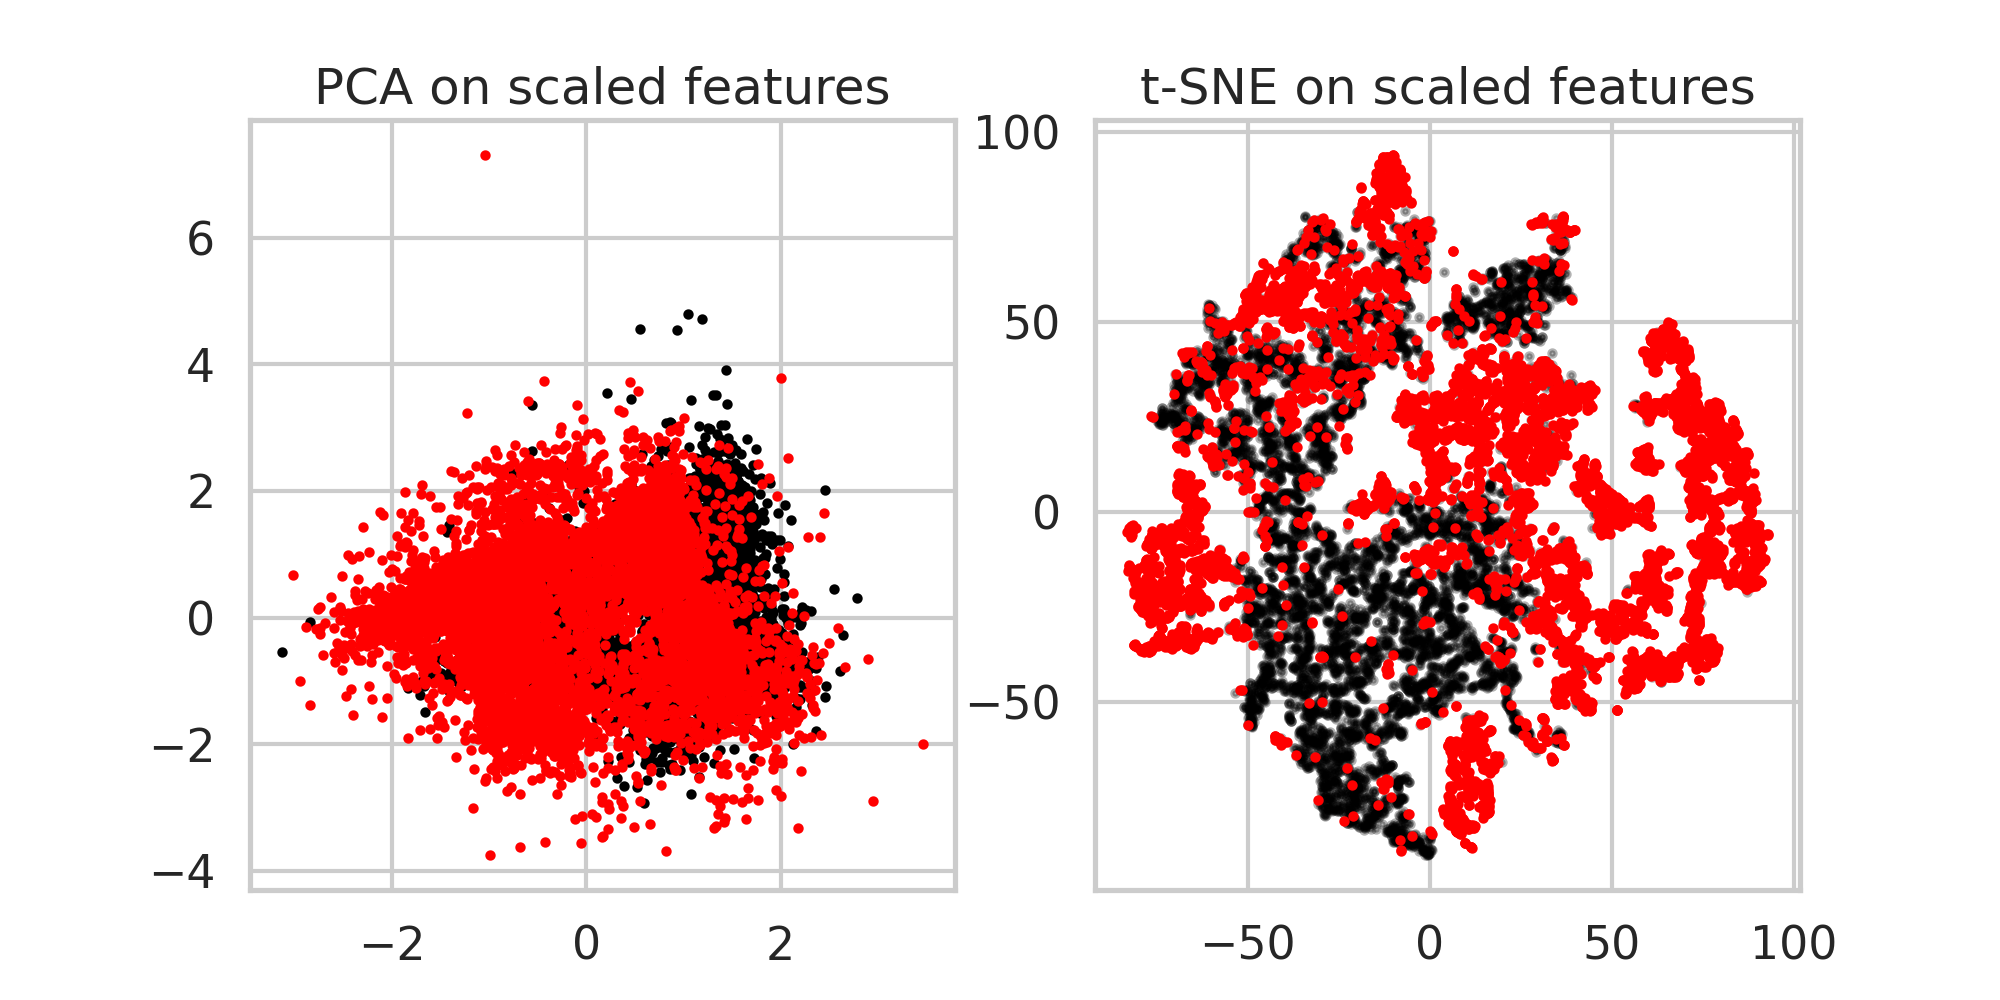

Text(0.5, 1.0, 't-SNE on scaled features')

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.scatter(X_pca_sc[(l_train == "GALAXY"), 0], X_pca_sc[(l_train == "GALAXY"), 1], s=5, color="black")
ax1.scatter(X_pca_sc[(l_train == "STAR"), 0], X_pca_sc[(l_train == "STAR"), 1], s=5, color="red")
ax1.set_title("PCA on scaled features")

ax2.scatter(X_tsne_sc[(l_train == "GALAXY"), 0], X_tsne_sc[(l_train == "GALAXY"), 1], s=5, color="black", alpha=0.3)
ax2.scatter(X_tsne_sc[(l_train == "STAR"), 0], X_tsne_sc[(l_train == "STAR"), 1], s=5, color="red")
ax2.set_title("t-SNE on scaled features")

## Picking a Machine Learning Algorithm to Start With

Which machine learning algorithm you choose for your problem depends, as we've discussed above, strongly on the type of problem you're trying to solve and the structure of the data. But even once you've decided whether you have a regression or classification problem, and whether it's an unsupervised or supervised one, there remain many algorithms to choose from!

For classification, bs you learned earlier this week, there are two different types of algorithms to keep in mind: *generative* algorithms and *discriminative* algorithms. Generative algorithms are named this way because they can *generate* data. A popular example is Gaussian Mixture Models (GMMs). Discriminative models draw more or less complex functions in a multi-dimensional space (the number of dimensions corresponds to your number of features). Broadly, in the regression case, these methods try to find the best function to draw *through* the data points in order to model them. In the classification case, these methods try to find a surface that *separates* the different classes from another (this is also called a decision boundary). 

One big question is how *interpretable* the model ought to be. Simpler algorithms are often easier to understand and the results more straightforward to interpret than from, say, a random forest. A general good suggestion is to start with the simplest model you think you can get away with, and only move to more complex models if your problem demands them.

Neural networks have been hugely successful in solving complex machine learning problems, in part because they can *learn* features rather than require the user to hand-craft them. While they do very well in many circumstances, be aware that this isn't *always* the case! These networks work really well (especially for image recognition) when you have no idea what your features ought to be, or there are things in your data that you can't model very easily (or that might be very expensive to model). However, if you understand the underlying structures in your data really well, then extracting physically meaningful features related to your problem can make your algorithm outperform those that need to learn these structures from scratch, or be faster to run.

There is another side to this, though: if you *don't* know structures in your data, then neural networks can be very powerful *emulators* of the process you're trying to model. This has been used, for example, for modelling detectors, where running physical simulations of these detectors would be hugely expensive.

**Exercise**: You've earlier tried out logistic regression as an algorithm. It's time to revisit this choice. Do you think it was a reasonable one? Given your data explorations earlier, do you think you could get away with fitting a linear model (i.e. a method linear in the parameters)? Or is your function complex enough that you'll need to fit a more complicated function? Note that for many problems, there isn't a single right answer. [This slightly tongue-in-cheek flow chart](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) might give you a starting point which methods to explore (Note that in my science projects, I very often end up in the field labelled "tough luck"). 

Some fun methods to try:
* Logistic Regression (linear)
* Support Vector Machines (linear)
* Decision Trees + Random Forests


### Hyperparameters

Before we go into actually applying a machine learning algorithm to our data, there is one more thing we need to think about: the parameters! Here's where it gets a little confusing, though, so bear with me. All maachine learning algorithms have parameters. For example, a neural network has *weights* for each of the connections between network nodes. However, basically all algorithms also have *hyperparameters*. For the K-Nearest Neighbour algorithm, one hyperparameter is the number of neighbours to use in order to determine the model value. For a random forest, one hyperparameter is the number of trees. 

**Exercise**: Take a look at the hyperparameters for the algorithm you picked above. Which do you think are particularly useful? Are there any that don't make sense to you at all? 

**Solution**: For now, let's stick with logistic regression. It has a number of parameters that might come in handy (see the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more info).
* `penalty`: describes the regularization of the algorithm, that is, the method by which it will try to counter-act overfitting. By default, it uses an [L2 penalty](https://mathworld.wolfram.com/L2-Norm.html). Regularization is a whole other topic that deserves its own lecture, so I encourage you to explore this on your own later.
* `tol`: this is the tolerace for stopping the optimization algorithm. Broadly, it decides how many iteration the algorithm will have to go through before it's deemed good enough.
* `C`: This is perhaps the most important parameter. It's a pre-factor to the penalty, and it steers how *important* that penalty is. Counter-intuitively, smaller values imply stronger regularization (less overfitting). When your training performance is *much* better than your validation performance, it might be useful to lower this value. Oftentimes, one might run the algorithm over a logarithmic grid of values for `C` and pick the one that returns the best cross-validation performance (see below for more on cross-validation).
* `class_weight`: If you have imbalanced classes (for example, many more stars than galaxies), and you're interested in the algorithm doing a good job on the class where you have fewer examples, it's helpful to set this `class_weight` in such a way that training examples that come from that class have a higher weight.


### K-Fold Cross Validation

Okay, so we've established that basically all machine learning methods have *hyperparameters* we somehow need to deal with.

What to do with all those hyperparameters? One way to deal with them is *model selection*. Each different set of hyperparameters defines a different models, which you can compare. To compare, you'll to *score* your model in some way, i.e. determine how good it is. What "good" means depends on your problem at hand. Above, you used the `score` method for the K-Nearest Neighbour method, which by default uses *accuracy*, i.e. the fraction of correctly identified samples in your data set. We've also seen above that accuracy isn't always the best option, depending on what you're trying to find out.

Another key piece of information is that there's a reasonably high *variance* in whatever score you compute. That is, a random slice into training and test data will produce different scores than a second random slice. One way to deal with this is called cross-validation. There are several kinds, but the most common one we'll discuss here is called **K-Fold Cross Validation**. Under this scheme, you split your training data set (*after* you've already set aside a test set!) into $K$ different slices. In the first instance, you train on nine of these slices, and test on the tenth. In the second instance, you train on slices 1-8 and 10 and test on 9. You continue this process until each of your slices has been used to test the performance. To formally distinguish these slices from your test set, these are usually called **validation** sets, because you use them to *validate* your model, and choose hyperparameters. 

**Note**: For problems with imbalanced class distributions, there's also a useful scikit-learn class called `StratifiedKFold`. Using this to set up your k-fold cross validation will ensure that all the subsets of data created by the k-fold cross validation always contain a proportional fraction of all classes. Otherwise, especially with classes that are rare in your data set, you might end up with training or validation sets that contain *no* examples of a class you're interested in.

**Exercise**: Check the hyperparameters for the algorithm you intend to use. Normally, you should try to learn enough about your algorithm in order to make some educated guesses for what those hyperparameters should be based on your problem, your data and the algorithm itself. In this case, however, we are going to use cross-validation in order to figure out which ones you should use. So pick a parameter you think might be important to your model's performance, and run cross-validation for multiple different values of this. Print or plot the resulting scores.

**Hint**:In `scikit-learn`, you can use e.g. [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) in order to evaluate models using cross-validation. You can learn more about evaluating the estimator performance with cross validation [here](https://scikit-learn.org/stable/modules/cross_validation.html).

**Solution**: Let's evaluate the effect of the regularization parameter `C` on the outcome of Logistic Regression. 

Let's first set up our logistic regression with one guess for what `C` might be, `C=1`.

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
lr = linear_model.LogisticRegression(C=1)

In [146]:
scores = cross_val_score(lr, X_train, l_train, cv=5)

/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [147]:
scores

array([0.71438105, 0.71671672, 0.71071071, 0.72172172, 0.70337004])

So this ran 5-fold cross-validation and returns 4 accuracy scores for the subset of data it trained on. This means that the computer split the data set inot 5 subsets. It then trained on the first four, and calculated a validation score on the last. Then it did the same again, but left out the second-to-last subset to use as a validation set, and so on, until every subset had been used once as a validation set. You can use more or fewer folds within the cross validation, but it's useful to remember: fewer folds of cross-validation means that you will be more uncertain about your scores (it's harder to see what the variance in scores is), but with more folds, there are fewer training examples per fold, which might degrade the performance.


So this gives me a performance of about ~70 percent.

Let's run this for a number of different values of `C`:

In [148]:
c_all = [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000]
mean_scores = []

for c in c_all:
    lr = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(lr, X_train, l_train, cv=5)
    mean_scores.append(np.mean(scores))
    
    print(f"Mean score for C={c}: {np.mean(scores)}")

Mean score for C=0.0001: 0.5528862195528862
Mean score for C=0.001: 0.5900567233900567
Mean score for C=0.01: 0.617017017017017


/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Mean score for C=0.1: 0.6778111444778112


/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Mean score for C=1.0: 0.7133800467133802


/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Mean score for C=10: 0.7250583917250584


/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Mean score for C=100: 0.7249916583249917


/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Mean score for C=1000: 0.7233233233233232


/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Mean score for C=10000: 0.7240573907240574


/astro/users/dhuppenk/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Looks like 72% is about the maximum of what we can achieve with this algorithm and these hyperparameters.

## Exploring the Results

Now is the time to explore the results: where did the algorithm do well? Are there parts of parameter space that the algorithm systematically gets wrong?

Here, you'll want to split your training data into a single training and single validation set using `test_train_split`, instead of doing cross-validation, so that you can explore the performance on a single validation set in more detail. 

Things to explore:
* ROC curves (see `sklearn.metrics.roc_curve`)
* plots of different features coloured by whether the algorithm successfully classified samples or not --> are there parts of parameter space where it does badly?
* make a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) (this is especially useful on problems with more than two classes :) )
* We've not talked a lot about scoring functions in this tutorial, but in reality, you might find that accuracy, AKA "how many samples were classified correctly" can be a bit of a limiting performance estimator in real circumstances. Take a look at [this tutorial](https://scikit-learn.org/stable/modules/model_evaluation.html) on scoring functions for more information.